# Explainable AI: A comparative evaluation of coronary disease risks using machine learning 


<br>
<br>
Name: KINGSLEY ORUBOH <br>
Student Id: V8202094<br>
Date: 03/05/2022<br>


<br>


<br>

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go



import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_blobs


#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import csv


import shap # SHAP values imporation
np.random.seed(123) #ensure reproducibility
shap.initjs()

from IPython.core.interactiveshell import InteractiveShell



In [2]:
pwd

'C:\\Users\\kings\\OneDrive - Teesside University\\CHD'

In [3]:
framingham = pd.read_csv('framingham.csv')
cleveland = pd.read_csv('cleveland.csv')

In [4]:
# view datasets 1
framingham.head(n=10)


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [5]:
# view datasets 2
cleveland.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   
5   64    1   0       170   227    0        2      155      0      0.6      1   
6   63    1   0       145   233    1        2      150      0      2.3      2   
7   61    1   0       134   234    0        0      145      0      2.6      1   
8   60    0   0       150   240    0        0      171      0      0.9      0   
9   59    1   0       178   270    0        2      145      0      4.2      2   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
5   0     2          0  
6   0     1          0  
7   2     0          1  
8   0     0          0  
9   0     2          0

<br>



<br>

# DATA CLEANING AND MODELLING OF FRAMINGHAM DATASET

About the  Framingham dataset

The dataset, which is publicly available on the Kaggle website, is derived from a continuous cardiovascular survey of inhabitants of Framingham, Massachusetts, and is available for download.
The dataset consists of 16 columns and over 4241 rows, all of which are kept in a text-based manner. Each column reflects a potential source of danger in the future. There are risk variables associated with demographic, behavioural, and medical characteristics. The final column contains the CHD for the last 10 years, and we must anticipate the value of this column according on the models that we have chosen.


The following is the information supplied by the dataset:


Demographics:

(Nominal) sex: male or female
Age: the age of the patient at the time of the study (Coninuous)


education level

Behavioral:
Current Smoker: Whether the patient currently smokes (Nominal) (0-No, 1-Yes)
Cigs Per Day: the average number of cigarettes smoked by a person in one day.(Continuous)


Medical History:

BP Meds: Determine if the patient was on blood pressure medication (binary-0-No, 1-Yes)
Stroke Prevalence: Determine if the patient has previously experienced a stroke (Nominal).
Prevalent Hyp: Determine if the patient was hypertensive (binary - 0 - No, 1 - Yes)
Diabetes:Determine if the patient had diabetes (Nominal) (binary-1-Yes, 0-No)

Target variable:

10 year risk of coronary heart disease (CHD) - (binary: "1" means "Yes", "0" means "No")


In [6]:
# read data shape
framingham.shape

(4238, 16)

In [7]:
# rename male colunm to Gender and TenYearCHD to Target
framingham.rename(columns={'male':'gender','TenYearCHD':'Target'},inplace=True)

In [8]:
# read data type
framingham.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Target               int64
dtype: object

In [9]:
#Check the dataset targeted variable
framingham.Target.value_counts()


target = framingham.Target.value_counts()
print('Class 0:', target[0])
print('Class 1:', target[1])
print('Proportion:', round(target[0] / target[1], 2), ': 1')

Class 0: 3594
Class 1: 644
Proportion: 5.58 : 1


In [10]:
# Describing the dataset to show its attributes
framingham.describe()

gender          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

            Target  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [11]:
# check for dupicates
duplicate_framingham = framingham[framingham.duplicated()]
duplicate_framingham

Empty DataFrame
Columns: [gender, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, Target]
Index: []

In [12]:
# checking for missing values
framingham.isna().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Target               0
dtype: int64

In [13]:
# check the percentage of roles with missing values
count=0
for i in framingham.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Number of roles with missing values are ', count)
print('Since the missing values is just ',round((count/len(framingham.index))*100), 'percent of the dataset, these roles will be removed.')

Number of roles with missing values are  582
Since the missing values is just  14 percent of the dataset, these roles will be removed.


In [14]:
# Drop roles with missing values
framingham = framingham.dropna()
framingham.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Target'],
      dtype='object')

In [15]:
# recheck for missing values
framingham.isna().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Target             0
dtype: int64

In [16]:
null = framingham[framingham.isna().any(axis=1)]
null

Empty DataFrame
Columns: [gender, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, Target]
Index: []

In [17]:
#Check the dataset targeted variable
framingham.Target.value_counts()

0    3099
1     557
Name: Target, dtype: int64

In [18]:
# Age group creation
framingham['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 53, 49, 65, 51, 62, 40, 56, 67, 57, 66, 64, 55, 58, 68,
       34, 33, 32, 70, 69], dtype=int64)

In [19]:
framingham['ageGroup'] = pd.cut(x=framingham['age'], bins=[30, 39, 49, 59, 70], 
                          labels=['30-39 years', '40-49 years', '50-59 years', '60-70 years'])
framingham.head()

gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   Target     ageGroup  
0       0  30-39 years  
1       0  40-49 years  
2       0  40-49 years  
3       1  60-70 years  
4       0  40-49 years

<br>
<br>
<br>
Data Visualization


In [20]:
# renaming the attributes for better visualization
framingham_vis= framingham.copy()
framingham_vis['gender'] = framingham_vis['gender'].map({0: 'female',1: 'male'})
framingham_vis['Target'] = framingham_vis['Target'].map({0:'negative', 1:'positive'})   
framingham_vis['diabetes']= framingham_vis['diabetes'].map({0:'negative', 1:'positive'}) 
framingham_vis['education']=framingham_vis['education'].map({1:'Some High School', 2:'High School or GED', 
                                                 3:'Some College or Vocational School', 4:'College'})
framingham_vis.head()


gender  age                          education  currentSmoker  cigsPerDay  \
0    male   39                            College              0         0.0   
1  female   46                 High School or GED              0         0.0   
2    male   48                   Some High School              1        20.0   
3  female   61  Some College or Vocational School              1        30.0   
4  female   46  Some College or Vocational School              1        23.0   

   BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
0     0.0                0             0  negative    195.0  106.0   70.0   
1     0.0                0             0  negative    250.0  121.0   81.0   
2     0.0                0             0  negative    245.0  127.5   80.0   
3     0.0                0             1  negative    225.0  150.0   95.0   
4     0.0                0             0  negative    285.0  130.0   84.0   

     BMI  heartRate  glucose    Target     ageGroup  
0  26.97       80.0     77.0  negative  30-39 years  
1  28.73       95.0     76.0  negative  40-49 years  
2  25.34       75.0     70.0  negative  40-49 years  
3  28.58       65.0    103.0  positive  60-70 years  
4  23.10       85.0     85.0  negative  40-49 years

In [21]:
# Create a colunm to count the target
framingham_vis['Count_Target'] = 1
framingham_vis.describe()

age  currentSmoker   cigsPerDay       BPMeds  prevalentStroke  \
count  3656.000000    3656.000000  3656.000000  3656.000000      3656.000000   
mean     49.557440       0.489059     9.022155     0.030361         0.005744   
std       8.561133       0.499949    11.918869     0.171602         0.075581   
min      32.000000       0.000000     0.000000     0.000000         0.000000   
25%      42.000000       0.000000     0.000000     0.000000         0.000000   
50%      49.000000       0.000000     0.000000     0.000000         0.000000   
75%      56.000000       1.000000    20.000000     0.000000         0.000000   
max      70.000000       1.000000    70.000000     1.000000         1.000000   

       prevalentHyp      totChol        sysBP        diaBP          BMI  \
count   3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean       0.311543   236.873085   132.368025    82.912062    25.784185   
std        0.463187    44.096223    22.092444    11.974825     4.065913   
min        0.000000   113.000000    83.500000    48.000000    15.540000   
25%        0.000000   206.000000   117.000000    75.000000    23.080000   
50%        0.000000   234.000000   128.000000    82.000000    25.380000   
75%        1.000000   263.250000   144.000000    90.000000    28.040000   
max        1.000000   600.000000   295.000000   142.500000    56.800000   

         heartRate      glucose  Count_Target  
count  3656.000000  3656.000000        3656.0  
mean     75.730580    81.856127           1.0  
std      11.982952    23.910128           0.0  
min      44.000000    40.000000           1.0  
25%      68.000000    71.000000           1.0  
50%      75.000000    78.000000           1.0  
75%      82.000000    87.000000           1.0  
max     143.000000   394.000000           1.0

In [22]:
framingham_gender = framingham_vis.pivot_table('Count_Target', ['gender', 'Target'], aggfunc="sum").reset_index()
framingham_gender.head()

gender    Target  Count_Target
0  female  negative          1784
1  female  positive           250
2    male  negative          1315
3    male  positive           307

In [23]:
# barchat plot of the gender by target


fig1 = px.bar(framingham_gender, x="gender", y = 'Count_Target', color='Target', 
              color_discrete_sequence=['Green', 'darkred'], 
              width = 600, height=400)

#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig1.update_layout(barmode='stack', title={'text': 'Probability of heart disease by gender', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig1.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))

fig1.show()

In [24]:
framingham_ed = framingham_vis.pivot_table('Count_Target', ['education', 'Target'], aggfunc="sum").reset_index()
framingham_ed.head()

education    Target  Count_Target
0                            College  negative           363
1                            College  positive            60
2                 High School or GED  negative           970
3                 High School or GED  positive           131
4  Some College or Vocational School  negative           531

In [25]:
fig2 = px.bar(framingham_ed, x="education", y = 'Count_Target', color='Target', 
              color_discrete_sequence=['green', 'DarkRed'], 
              width=700, height=400)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig2.update_layout(barmode='stack', title={'text': 'Prrobability of heart disease by Education Level', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig2.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig2.show()

In [26]:
# gender that smoke more when compared by age group

framingham_ga_s = framingham_vis.pivot_table('currentSmoker', ['gender', 'ageGroup'], aggfunc="sum").reset_index()
framingham_ga_s.head(10)

gender     ageGroup  currentSmoker
0  female  30-39 years            139
1  female  40-49 years            402
2  female  50-59 years            200
3  female  60-70 years             66
4    male  30-39 years            139
5    male  40-49 years            439
6    male  50-59 years            284
7    male  60-70 years            119

In [27]:
fig3 = px.bar(framingham_ga_s, x= 'ageGroup', y="currentSmoker", color='gender', 
              color_discrete_sequence=['red', 'blue' ], 
              width=600, height=400)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig3.update_layout(barmode='stack', title={'text': 'Number of Current Smokers by Gender and Age Group', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig3.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig3.show()

In [28]:
#Check for the relationship of some conditions of heart disease (diabetes, high blood pressure, stroke).

heart_conditions = framingham_vis.pivot_table('Count_Target', ['diabetes', 'prevalentStroke', 'prevalentHyp', 'Target'], aggfunc="sum").reset_index()
heart_conditions['diabetes'] = heart_conditions['diabetes'].replace(['positive','negative'], ['Diabetic','Non-Diabetic'])
heart_conditions['prevalentHyp']=heart_conditions['prevalentHyp'].replace([0,1],['Not Hypertensive', 'Hypertensive'])
heart_conditions['prevalentStroke']=heart_conditions['prevalentStroke'].replace([0,1],['Never had a stroke', 'Has had a stroke'])
heart_conditions.head(14)

diabetes     prevalentStroke      prevalentHyp    Target  Count_Target
0   Non-Diabetic  Never had a stroke  Not Hypertensive  negative          2205
1   Non-Diabetic  Never had a stroke  Not Hypertensive  positive           260
2   Non-Diabetic  Never had a stroke      Hypertensive  negative           817
3   Non-Diabetic  Never had a stroke      Hypertensive  positive           255
4   Non-Diabetic    Has had a stroke  Not Hypertensive  negative             5
5   Non-Diabetic    Has had a stroke  Not Hypertensive  positive             1
6   Non-Diabetic    Has had a stroke      Hypertensive  negative             8
7   Non-Diabetic    Has had a stroke      Hypertensive  positive             6
8       Diabetic  Never had a stroke  Not Hypertensive  negative            34
9       Diabetic  Never had a stroke  Not Hypertensive  positive            12
10      Diabetic  Never had a stroke      Hypertensive  negative            30
11      Diabetic  Never had a stroke      Hypertensive  positive            22
12      Diabetic    Has had a stroke      Hypertensive  positive             1

In [29]:
framingham_hyper = heart_conditions.groupby(['prevalentHyp', 'Target']).sum().reset_index()
framingham_hyper.head()

prevalentHyp    Target  Count_Target
0      Hypertensive  negative           855
1      Hypertensive  positive           284
2  Not Hypertensive  negative          2244
3  Not Hypertensive  positive           273

In [30]:
plot4 = px.bar(framingham_hyper, x= 'Target', y="Count_Target", color='prevalentHyp', 
              color_discrete_sequence=['red', 'Blue' ], 
              width=500, height=400)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
plot4.update_layout(barmode='stack', title={'text': 'Prevalent Hypertension and Probability of hear disease', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
plot4.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
plot4.show()

In [31]:
framingham_diabetes = heart_conditions.groupby(['diabetes', 'Target']).sum().reset_index()
framingham_diabetes.head()

diabetes    Target  Count_Target
0      Diabetic  negative            64
1      Diabetic  positive            35
2  Non-Diabetic  negative          3035
3  Non-Diabetic  positive           522

In [32]:
plot5 = px.bar(framingham_diabetes, x= 'Target', y="Count_Target", color='diabetes', 
              color_discrete_sequence=['Red', 'blue' ], 
              width=500, height=400)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
plot5.update_layout(barmode='stack', title={'text': 'Probability  developing of heart disease by Diabetes', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
plot5.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
plot5.show()

In [33]:
plot6 = px.box(framingham_vis, x="ageGroup", y="totChol", color_discrete_sequence=['Darkgreen'], width=700, height=400)
plot6.update_layout(
    title={
        'text': "Total Cholesterol by age group",
        'x':0.5,
        'xanchor': 'center'})

plot6.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
plot6.show()

In [34]:
plot7 = px.box(framingham_vis, x="ageGroup", y="glucose", color_discrete_sequence=['grey'], width=700, height=500)
plot7.update_layout(
    title={
        'text': "Glucose by age group",
        'x':0.5,
        'xanchor': 'center'})
plot7.show()

In [35]:
bpage = go.Box(x=framingham_vis['ageGroup'],y=framingham_vis['sysBP'], 
                name='Systolic Blood Pressure', line=dict(color='steelblue'),)
bpage1 = go.Box(x=framingham_vis['ageGroup'], y=framingham_vis['diaBP'], 
                name='Diastolic Blood Pressure', line=dict(color='goldenrod'))

plot8 = go.Figure([bpage, bpage1])
plot8.update_layout(
    title={
        'text': "Blood Pressure by Age Group",
        'x':0.5,
        'xanchor': 'center'})
plot8.show()

The education colunm will be eliminated in order to prevent subjective results.


In [36]:
# Dropping columns education and ageGroup colunm
framingham= framingham.drop(['education', 'ageGroup'], axis=1)

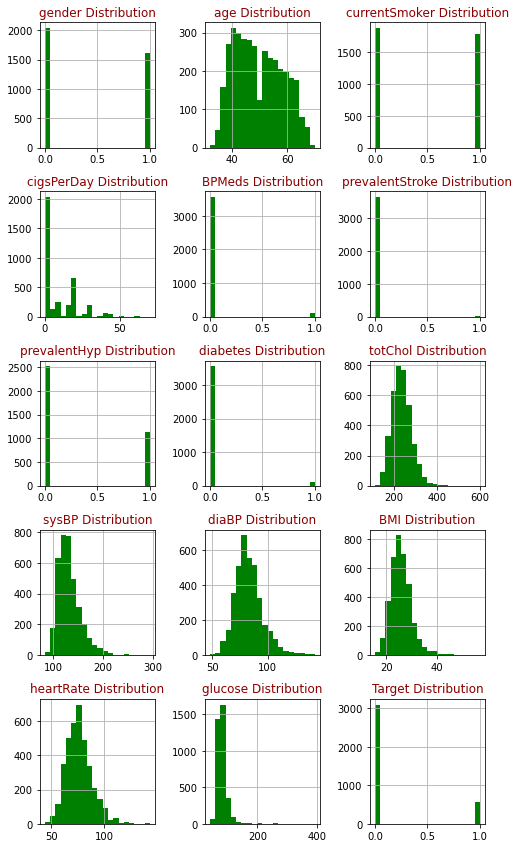

In [37]:
# plotting the distribution using histogram
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(7,14))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(framingham,framingham.columns,6,3)

<br>

# PREPARING THE DATA FOR MACHINE LEARNING MODELING



<br>

CORRELATION MATRX

In [38]:
framingham_correlation = framingham.corr()
framingham_correlation

gender       age  currentSmoker  cigsPerDay    BPMeds  \
gender           1.000000 -0.024387       0.206778    0.331243 -0.052128   
age             -0.024387  1.000000      -0.210862   -0.189099  0.134670   
currentSmoker    0.206778 -0.210862       1.000000    0.773819 -0.051936   
cigsPerDay       0.331243 -0.189099       0.773819    1.000000 -0.046479   
BPMeds          -0.052128  0.134670      -0.051936   -0.046479  1.000000   
prevalentStroke -0.002308  0.050864      -0.038159   -0.036283  0.113119   
prevalentHyp     0.000806  0.306693      -0.107561   -0.069890  0.263047   
diabetes         0.013833  0.109027      -0.041859   -0.036934  0.049051   
totChol         -0.070229  0.267764      -0.051119   -0.030222  0.094011   
sysBP           -0.045484  0.388551      -0.134371   -0.094764  0.271291   
diaBP            0.051575  0.208880      -0.115748   -0.056650  0.199750   
BMI              0.072867  0.137172      -0.159574   -0.086888  0.105603   
heartRate       -0.114923 -0.002685       0.050452    0.063549  0.012894   
glucose          0.003048  0.118245      -0.053346   -0.053803  0.054210   
Target           0.091745  0.233810       0.019176    0.052159  0.089116   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
gender                 -0.002308      0.000806  0.013833 -0.070229 -0.045484   
age                     0.050864      0.306693  0.109027  0.267764  0.388551   
currentSmoker          -0.038159     -0.107561 -0.041859 -0.051119 -0.134371   
cigsPerDay             -0.036283     -0.069890 -0.036934 -0.030222 -0.094764   
BPMeds                  0.113119      0.263047  0.049051  0.094011  0.271291   
prevalentStroke         1.000000      0.066098  0.009619  0.012697  0.061080   
prevalentHyp            0.066098      1.000000  0.080623  0.167074  0.697790   
diabetes                0.009619      0.080623  1.000000  0.048371  0.102574   
totChol                 0.012697      0.167074  0.048371  1.000000  0.220130   
sysBP                   0.061080      0.697790  0.102574  0.220130  1.000000   
diaBP                   0.055878      0.617634  0.050767  0.174986  0.786727   
BMI                     0.036478      0.302917  0.088970  0.120799  0.331004   
heartRate              -0.017020      0.147333  0.060996  0.093057  0.184901   
glucose                 0.016051      0.087129  0.614817  0.049749  0.134702   
Target                  0.048351      0.181556  0.093397  0.091127  0.222885   

                    diaBP       BMI  heartRate   glucose    Target  
gender           0.051575  0.072867  -0.114923  0.003048  0.091745  
age              0.208880  0.137172  -0.002685  0.118245  0.233810  
currentSmoker   -0.115748 -0.159574   0.050452 -0.053346  0.019176  
cigsPerDay      -0.056650 -0.086888   0.063549 -0.053803  0.052159  
BPMeds           0.199750  0.105603   0.012894  0.054210  0.089116  
prevalentStroke  0.055878  0.036478  -0.017020  0.016051  0.048351  
prevalentHyp     0.617634  0.302917   0.147333  0.087129  0.181556  
diabetes         0.050767  0.088970   0.060996  0.614817  0.093397  
totChol          0.174986  0.120799   0.093057  0.049749  0.091127  
sysBP            0.786727  0.331004   0.184901  0.134702  0.222885  
diaBP            1.000000  0.385611   0.179008  0.063704  0.150342  
BMI              0.385611  1.000000   0.074401  0.083671  0.081931  
heartRate        0.179008  0.074401   1.000000  0.097026  0.020523  
glucose          0.063704  0.083671   0.097026  1.000000  0.121942  
Target           0.150342  0.081931   0.020523  0.121942  1.000000

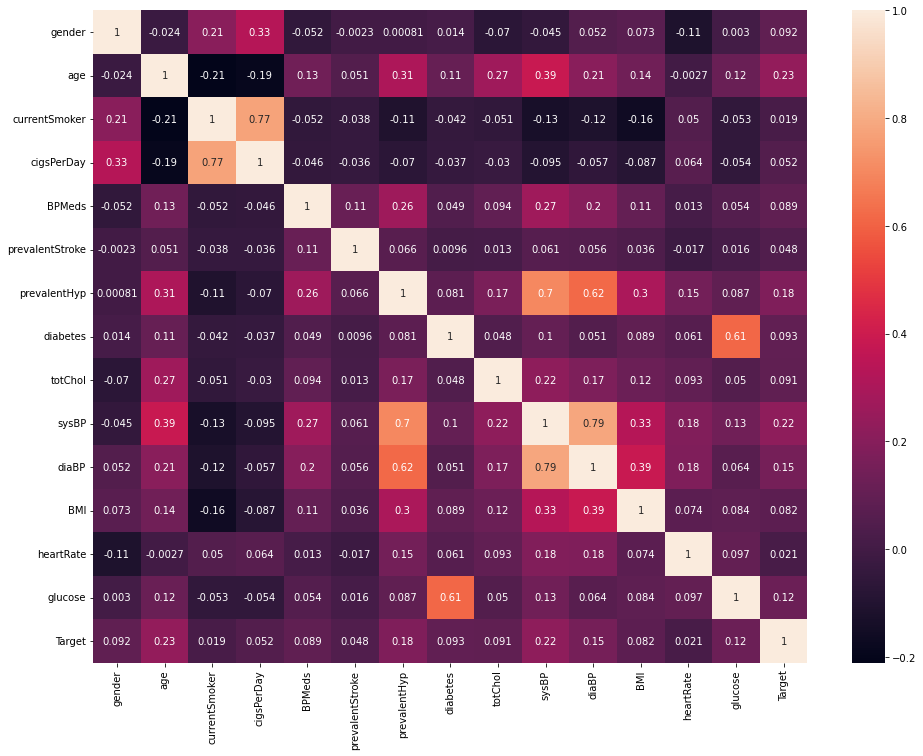

In [39]:
# checking which features are correlated with each other and are correlated with the outcome variable
# framingham_correlation = framingham.corr()
#sns.heatmap(framingham_correlation)

f, ax = plt.subplots(figsize=(16,12))

sns.heatmap(framingham_correlation, annot=True);

Each of the factors' correlation coefficients did not demonstrate a significant relationship with Target on their own. These means tha the likelihood of acquiring heart disease is a consequence of many variables acting in concert to increase one's risk.

<br>


DENOISING THE DATA

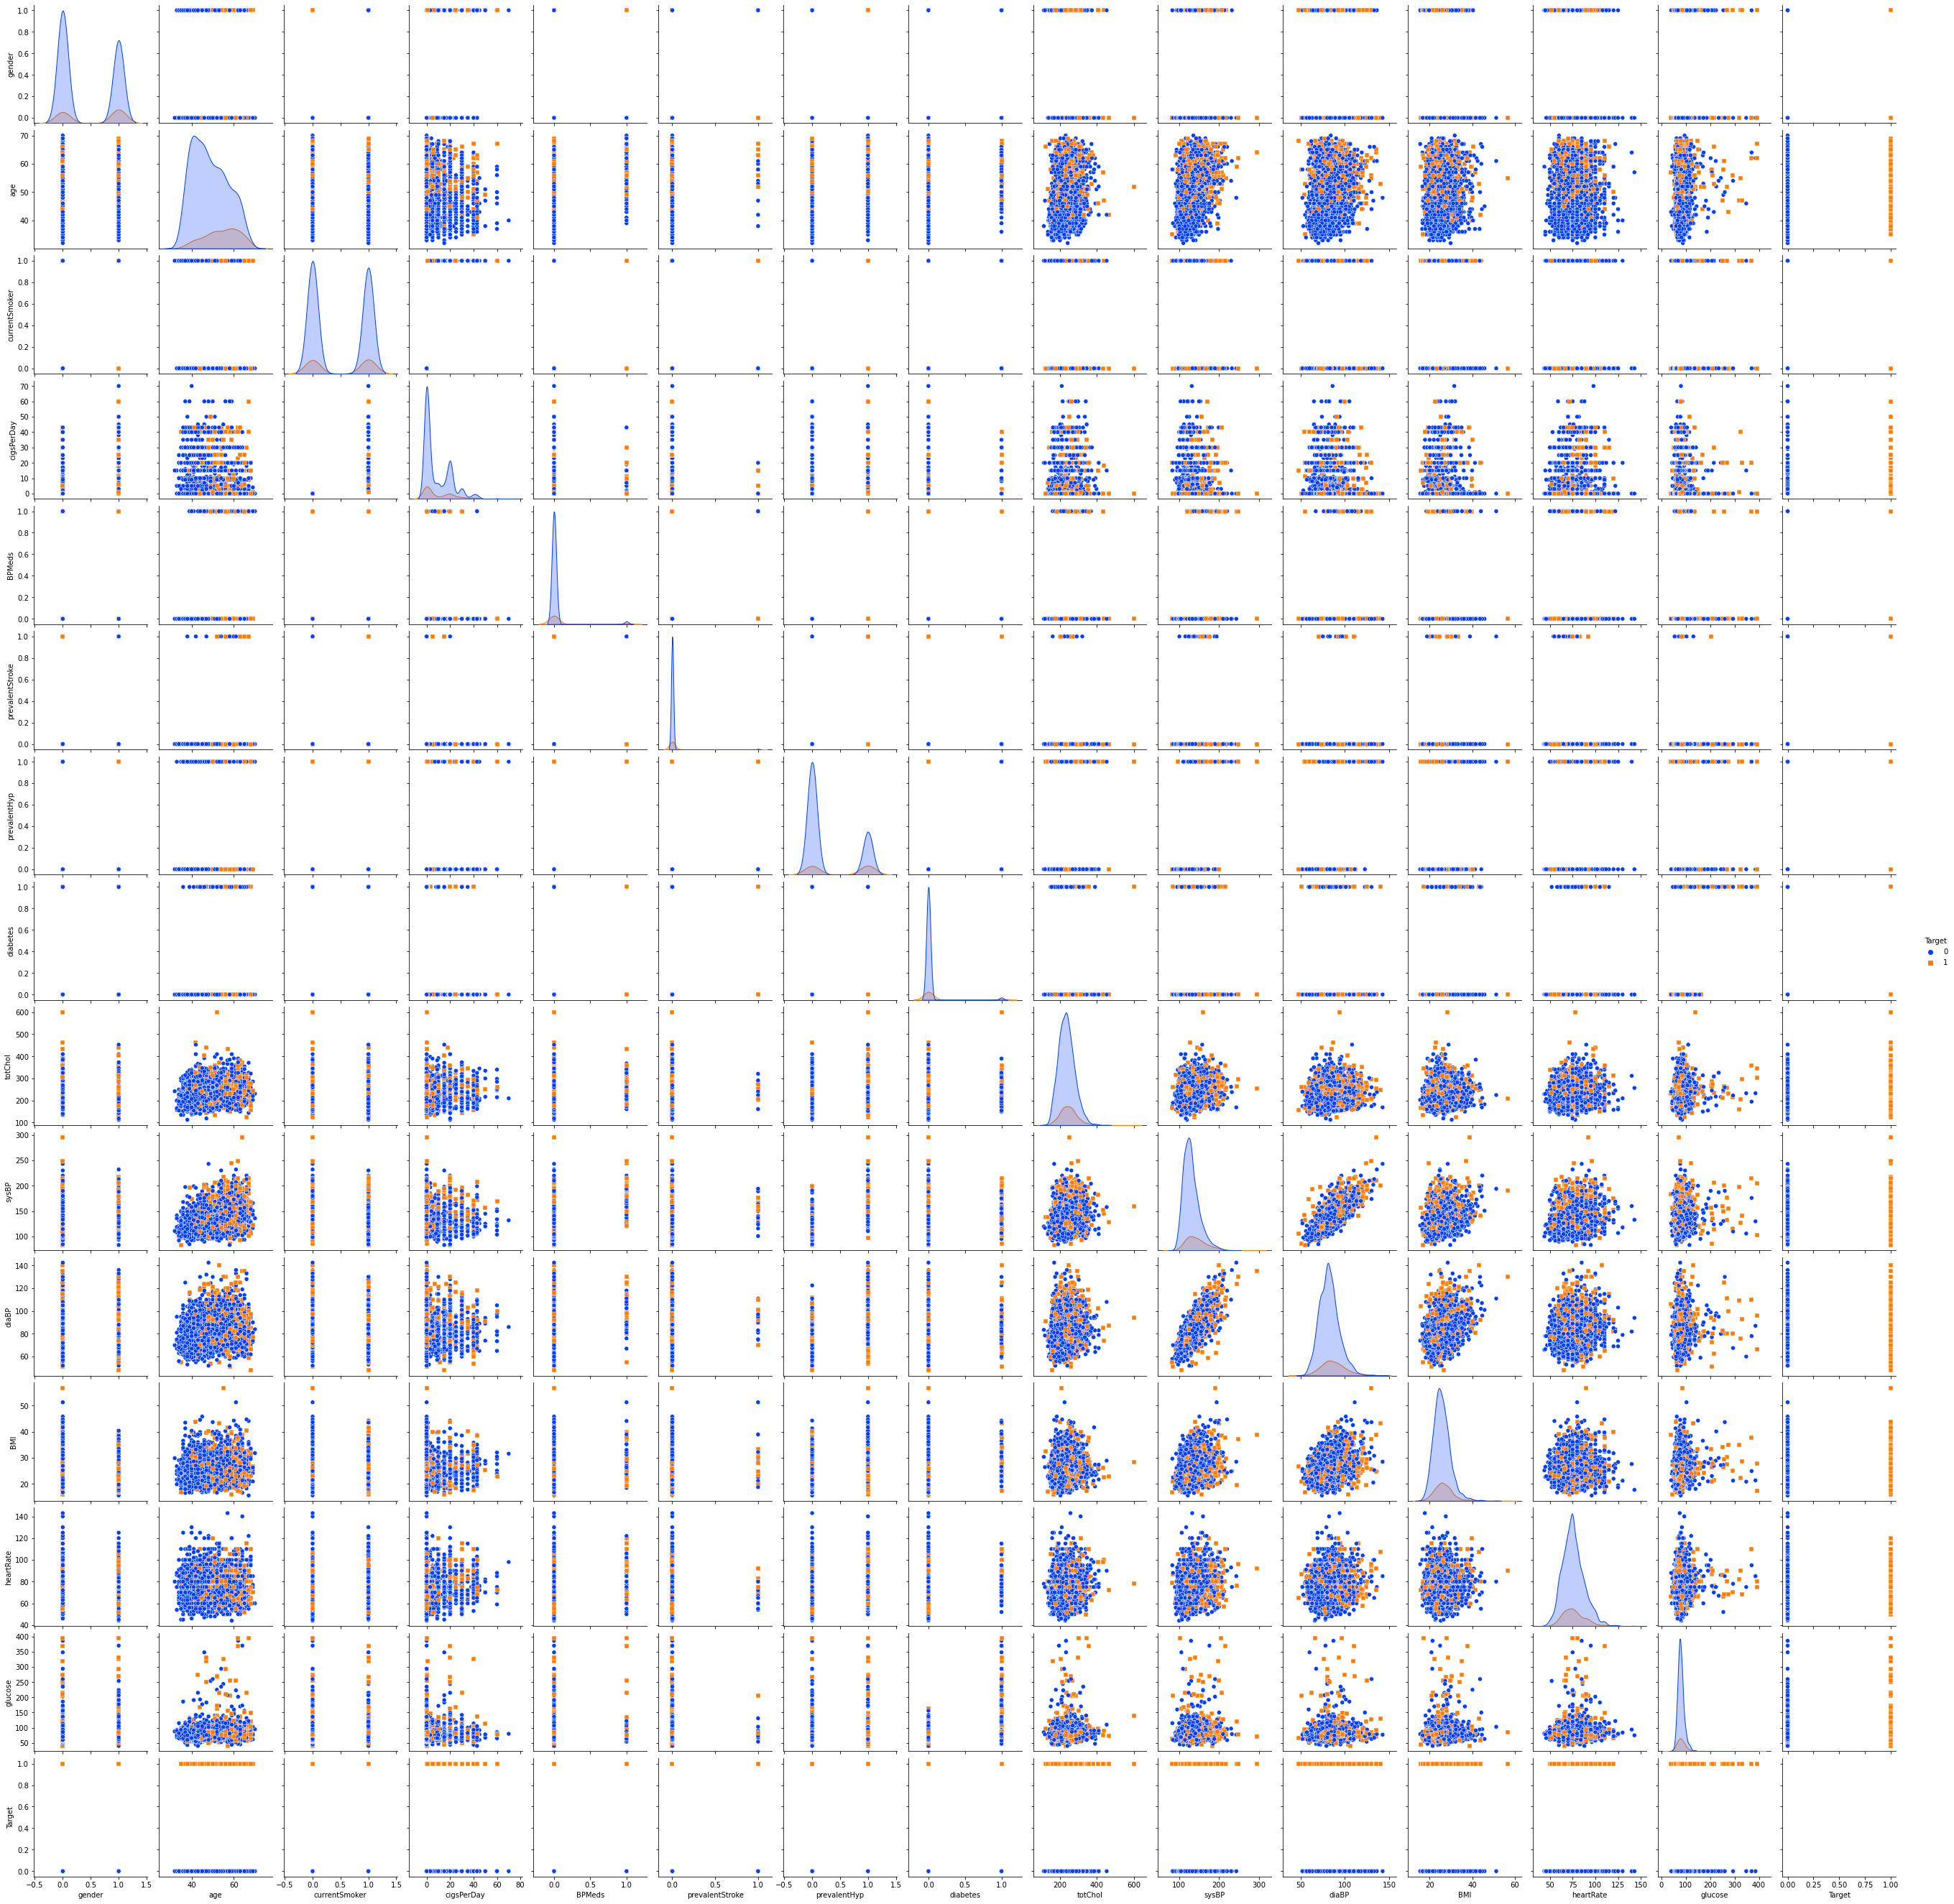

In [40]:
# Checking for outliers
framingham.describe()
sns.pairplot(framingham,  hue = 'Target', markers=["o", "s"],
             vars = framingham, palette = sns.color_palette("bright", 2))

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


gender  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
1111       0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
1111             1         1    600.0  159.5   94.0  28.27       78.0   

      glucose  Target  
1111    140.0       1

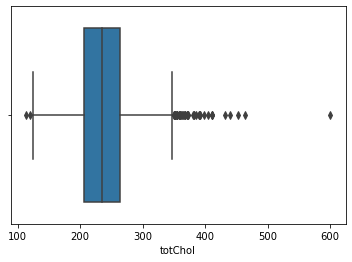

In [41]:
# Zooming into cholesterin outliers

sns.boxplot(framingham.totChol)
outliers = framingham[(framingham['totChol'] > 500)] 
outliers



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='totChol'>

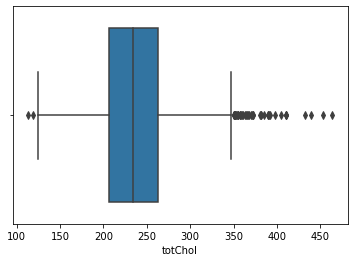

In [42]:

# Dropping 2 outliers in cholesterin
framingham_clean = framingham.drop(framingham[framingham.totChol > 500].index)
sns.boxplot(framingham_clean.totChol)

<br>
<br>

# USING ALL THE FEATURES

In [43]:
framingham_clean.describe()

gender          age  currentSmoker   cigsPerDay       BPMeds  \
count  3655.000000  3655.000000    3655.000000  3655.000000  3655.000000   
mean      0.443776    49.556772       0.489193     9.024624     0.030369   
std       0.496897     8.562209       0.499952    11.919565     0.171625   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      3655.000000   3655.000000  3655.000000  3655.000000  3655.000000   
mean          0.005746      0.311354     0.026813   236.773735   132.360602   
std           0.075592      0.463111     0.161557    43.691102    22.090906   
min           0.000000      0.000000     0.000000   113.000000    83.500000   
25%           0.000000      0.000000     0.000000   206.000000   117.000000   
50%           0.000000      0.000000     0.000000   234.000000   128.000000   
75%           0.000000      1.000000     0.000000   263.000000   143.750000   
max           1.000000      1.000000     1.000000   464.000000   295.000000   

             diaBP          BMI    heartRate      glucose       Target  
count  3655.000000  3655.000000  3655.000000  3655.000000  3655.000000  
mean     82.909029    25.783505    75.729959    81.840219     0.152120  
std      11.975058     4.066261    11.984533    23.894041     0.359187  
min      48.000000    15.540000    44.000000    40.000000     0.000000  
25%      75.000000    23.080000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.035000    82.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

<br>

DATA NORMALIZATION

<br>
Scaling the features

Aside from decision trees and random forests, the other classifiers that will be evaluated will need scaled data in order to be effective.

In [44]:
framingham_scaler =framingham_clean
scaler = MinMaxScaler(feature_range=(0,1)) 

framingham_scaler= pd.DataFrame(scaler.fit_transform(framingham_scaler), columns=framingham_scaler.columns)
framingham_scaler.describe()


gender          age  currentSmoker   cigsPerDay       BPMeds  \
count  3655.000000  3655.000000    3655.000000  3655.000000  3655.000000   
mean      0.443776     0.462020       0.489193     0.128923     0.030369   
std       0.496897     0.225321       0.499952     0.170279     0.171625   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.263158       0.000000     0.000000     0.000000   
50%       0.000000     0.447368       0.000000     0.000000     0.000000   
75%       1.000000     0.631579       1.000000     0.285714     0.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol        sysBP  \
count      3655.000000   3655.000000  3655.000000  3655.000000  3655.000000   
mean          0.005746      0.311354     0.026813     0.352632     0.231019   
std           0.075592      0.463111     0.161557     0.124476     0.104449   
min           0.000000      0.000000     0.000000     0.000000     0.000000   
25%           0.000000      0.000000     0.000000     0.264957     0.158392   
50%           0.000000      0.000000     0.000000     0.344729     0.210402   
75%           0.000000      1.000000     0.000000     0.427350     0.284870   
max           1.000000      1.000000     1.000000     1.000000     1.000000   

             diaBP          BMI    heartRate      glucose       Target  
count  3655.000000  3655.000000  3655.000000  3655.000000  3655.000000  
mean      0.369408     0.248267     0.320505     0.118193     0.152120  
std       0.126720     0.098552     0.121056     0.067497     0.359187  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.285714     0.182744     0.242424     0.087571     0.000000  
50%       0.359788     0.238488     0.313131     0.107345     0.000000  
75%       0.444444     0.302836     0.383838     0.132768     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

<br>
<br>
<br>
<br>
SPLITTING THE DATASET

In [45]:

#Splitting the dataset into y and x
fr =framingham_scaler
y = fr['Target']
X = fr.drop(['Target'], axis = 1)

#divide the data into train and test: 85 % - 15 %
fr_train, fr_test = train_test_split(fr, test_size = 0.15, random_state=4)
print("fr_train dataset: ", fr_train.shape)
print("fr_test dataset: ", fr_test.shape)



fr_train dataset:  (3106, 15)
fr_test dataset:  (549, 15)


In [46]:

#lebeling the x and y axis for the test (validation dataset)

y_test = fr_test['Target']
X_test = fr_test.drop(['Target'], axis = 1)
y_train = fr_train['Target']
X_train = fr_train.drop(['Target'], axis = 1)

print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)


X_test dataset:  (549, 14)
y_test dataset:  (549,)
X_train dataset:  (3106, 14)
y_train dataset:  (3106,)


# <br>

UNDERSAMPLING METHOD <br>

Undersampling is a technique used to reduce the number of instances of a certain class that is overrepresented in a data collection. In this case, these strategies will reduce the number of negative CHD outcomes in our data to around 1.18:1, with the positive CHD result being the more common outcome. The number of cases should be balanced; otherwise, most classification algorithms will place a heavy emphasis on the majority class. Consequently, it may look like the algorithm is getting great results when, in fact, it is just correctly predicting the majority of the class.

The simplest method for doing this is to randomly choose observations from the majority class and delete them from the data set until we have achieved a balance between the majority and minority classes, as shown in Figure 1

Only the  train dataset will be undersampled 

Class 0: 2621
Class 1: 485
Proportion: 5.4 : 1


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


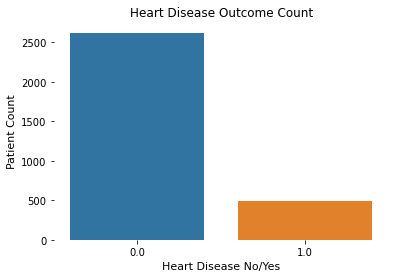

In [47]:
# Checking balance of train dataset outcome variable
target_count = fr_train.Target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(fr_train.Target,)
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Heart Disease Outcome Count')
plt.show()

In [48]:

# Shuffle heart
shuffled = fr_train.sample(frac=1,random_state=4)

# Put all the positive class in a separate dataset.
CHD_fra = fr_train.loc[fr_train['Target'] == 1]

#Randomly select 492 observations from the negative (majority class)
less_CHD_fra = shuffled.loc[shuffled['Target'] == 0].sample(n=605,random_state=0)

# Concatenate both dataframes again
undsamp_fra= pd.concat([CHD_fra, less_CHD_fra])

# check new class counts
undsamp_fra.Target.value_counts()






0.0    605
1.0    485
Name: Target, dtype: int64

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Class 0: 605
Class 1: 485
Proportion: 1.25 : 1


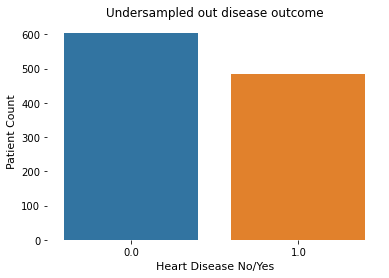

In [49]:

# Checking balance of outcome variable
target_count = undsamp_fra.Target.value_counts()
print('Class 0:', target_count [0])
print('Class 1:', target_count [1])
print('Proportion:', round(target_count [0] / target_count [1], 2), ': 1')

# plot new count
sns.countplot(undsamp_fra.Target,)
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Undersampled out disease outcome')
plt.show()



<br>
<br>
<br>
<br>
BALANCING THE TARGET CLASS USING SMOTE (OVERSAMPLING) AND RANDOM UNDER-SAMPLING

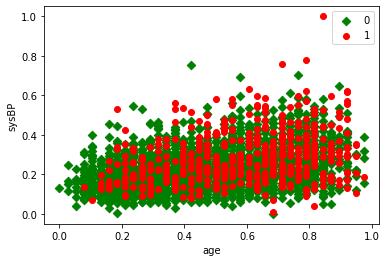

Class 0: 2621
Class 1: 485
Proportion: 5.4 : 1


In [50]:
plt.scatter(fr_train['age'][(fr_train.Target == 0) | (fr_train.Target == 0)],
            fr_train['sysBP'][(fr_train.Target == 0) | (fr_train.Target == 0)],
           marker='D',
           color='green',
           label=0)
plt.scatter(fr_train['age'][fr_train.Target== 1],
            fr_train['sysBP'][fr_train.Target == 1],
           marker='o',
           color='red',
           label=1)
plt.xlabel('age')
plt.ylabel('sysBP')
plt.legend()
plt.show()


# Proportion of 0 to 1
fr_train.Target.value_counts()

c_target = fr_train.Target.value_counts()
print('Class 0:', c_target[0])
print('Class 1:', c_target[1])
print('Proportion:', round(c_target[0] / c_target[1], 2), ': 1')

In [51]:

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
# define dataset

# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
ovsamp_X_train, ovsamp_y_train = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(ovsamp_y_train)
print(counter)
print('')

print('After OverSampling, the shape of train_X: {}'.format(ovsamp_X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ovsamp_y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(ovsamp_y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(ovsamp_y_train==0)))

Counter({0.0: 2621, 1.0: 485})
Counter({0.0: 1310, 1.0: 1048})

After OverSampling, the shape of train_X: (2358, 14)
After OverSampling, the shape of train_y: (2358,) 

After OverSampling, counts of label '1': 1048
After OverSampling, counts of label '0': 1310


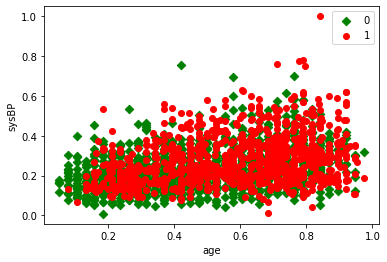

Class 0: 1310
Class 1: 1048
Proportion: 1.25 : 1


In [52]:
# plot the oversampled dataset


ovsamp_fra = pd.concat([pd.DataFrame(ovsamp_X_train), pd.DataFrame(ovsamp_y_train)], axis=1)

plt.scatter(ovsamp_fra['age'][(ovsamp_fra.Target == 0) | (ovsamp_fra.Target == 0)],
            ovsamp_fra['sysBP'][(ovsamp_fra.Target == 0) | (ovsamp_fra.Target == 0)],
           marker='D',
           color='green',
           label=0)
plt.scatter(ovsamp_fra['age'][ovsamp_fra.Target== 1],
            ovsamp_fra['sysBP'][ovsamp_fra.Target == 1],
           marker='o',
           color='red',
           label=1)
plt.xlabel('age')
plt.ylabel('sysBP')
plt.legend()
plt.show()


# Proportion of 0 to 1
ovsamp_fra.Target.value_counts()

o_target = ovsamp_fra.Target.value_counts()
print('Class 0:', o_target[0])
print('Class 1:', o_target[1])
print('Proportion:', round(o_target[0] / o_target[1], 2), ': 1')

<br>
<br>
<br>
<br>
<br>
MACHINE LEARNIND MODEL

In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(ovsamp_X_train, ovsamp_y_train)
dtc_pd = dtc.predict(X_test)


acc_dtc = accuracy_score(y_test, dtc_pd)
print(f"The accuracy score for Decision Tree is: {round(acc_dtc,3)*100}%")

# f1 score:  score at 0.
f1_dtc = f1_score(y_test, dtc_pd)
print(f"The f1 score for Decision Tree is: {round(f1_dtc,3)*100}%")

# Precision score: 
precision_dtc = precision_score(y_test, dtc_pd)
print(f"The precision score for Decision Tree is: {round(precision_dtc,3)*100}%")

# recall score: 
recall_dtc = recall_score(y_test, dtc_pd)
print(f"The recall score for Decision Tree is: {round(recall_dtc,3)*100}%")


print("")
print("")

lr = LogisticRegression()
lr.fit(ovsamp_X_train, ovsamp_y_train)
lr_pd =lr.predict(X_test)


acc_lr = accuracy_score(y_test, lr_pd)
print(f"The accuracy score for Logistic Regression is: {round(acc_lr,3)*100}%")

# f1 score:  score at 0.
f1_lr = f1_score(y_test, lr_pd)
print(f"The f1 score for Logistic Regression is: {round(f1_lr,3)*100}%")

# Precision score: 
precision_lr = precision_score(y_test, lr_pd)
print(f"The precision score for Logistic Regression is: {round(precision_lr,3)*100}%")

# recall score: 
recall_lr = recall_score(y_test, lr_pd)
print(f"The recall score for Logistic Regression is: {round(recall_lr,3)*100}%")


print("")
print("")


svm = SVC()
svm.fit(ovsamp_X_train, ovsamp_y_train)
svm_pd = svm.predict(X_test)

svm_acc=accuracy_score(y_test, svm_pd)
print(f"Support Vector Machine Accuracy Score is:{round(svm_acc,3)*100}%")

svm_pr=precision_score(y_test, svm_pd)
print(f"Precision Score is: {round(svm_pr,3)*100}%")

svm_f1 = f1_score(y_test, svm_pd)
print(f"fi Score is: {round(svm_f1,3)*100}%")

svm_rc= recall_score(y_test, svm_pd)
print(f"Recall Score is:{round(svm_rc,3)*100}%")


print("")
print("")


# KNN Model

#initialize model
knn = KNeighborsClassifier()

#fit model
knn.fit(ovsamp_X_train, ovsamp_y_train)

# prediction = knn.predict(x_test)
knn_pd = knn.predict(X_test)


# check accuracy
acc_knn = accuracy_score(y_test, knn_pd)
print(f"K Nearest Neighbor accuracy score is: {round(acc_knn,3)*100}%")

# f1 score: 
f1_knn = f1_score(y_test, knn_pd)
print(f"K Nearest Neighbor  f1 score  is: {round(f1_knn,3)*100}%")

# Precision score:
precision_knn = precision_score(y_test, knn_pd)
print(f"K Nearest Neighbor precision score is: {round(precision_knn,3)*100}%")

# recall score:
recall_knn = recall_score(y_test, knn_pd)
print(f"K Nearest Neighbor  recall score is: {round(recall_knn,3)*100}%")

The accuracy score for Decision Tree is: 67.9%
The f1 score for Decision Tree is: 27.3%
The precision score for Decision Tree is: 19.3%
The recall score for Decision Tree is: 46.5%


The accuracy score for Logistic Regression is: 75.0%
The f1 score for Logistic Regression is: 34.4%
The precision score for Logistic Regression is: 26.1%
The recall score for Logistic Regression is: 50.7%


Support Vector Machine Accuracy Score is:73.6%
Precision Score is: 26.3%
fi Score is: 36.1%
Recall Score is:57.699999999999996%


K Nearest Neighbor accuracy score is: 68.30000000000001%
K Nearest Neighbor  f1 score  is: 28.7%
K Nearest Neighbor precision score is: 20.200000000000003%
K Nearest Neighbor  recall score is: 49.3%


<br>

<br>
CROSS VALIDATION OF THE MODELS USING HYPERPARAMETER TUNNING <br>


Cross-validation, also known as the out of sampling approach, is a resampling process for evaluating machine learning models and determining how they would perform on an independent test dataset. <br>
Through the process of cross-validation, we may get several metrics of model quality by running our modelling process on different subsets of the data.

Consider the following example: we may start by partitioning the data into five parts, each of which represents 20% of the whole dataset. In this example, we refer to the data as having been divided into five "folds."

<br>
Decision Tree

In [54]:

# example of grid searching key hyperparameters for a Decision tree


# define models and parameters
dtc = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']

# define grid search
dtc_grid = dict(criterion=criterion, splitter = splitter,max_features=max_features)
cv = 5
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
dtc_grid_result = dtc_grid_search.fit(ovsamp_X_train, ovsamp_y_train)
# summarize results
print("Best DTC hypoerparamenter tunning with cross validation is: %f using %s" % (dtc_grid_result.best_score_,
                                                                                    dtc_grid_result.best_params_))

print('')
dtc_means = dtc_grid_result.cv_results_['mean_test_score']
dtc_stds = dtc_grid_result.cv_results_['std_test_score']
dtc_params = dtc_grid_result.cv_results_['params']
for dtc_mean, dtc_stdev, dtc_param in zip(dtc_means, dtc_stds, dtc_params):
    print("%f (%f) with: %r" % (dtc_mean, dtc_stdev, dtc_param))

Best DTC hypoerparamenter tunning with cross validation is: 0.707827 using {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}

0.693407 (0.024983) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
0.707827 (0.036178) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}
0.685786 (0.040857) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.686617 (0.024987) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.692575 (0.042364) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.686199 (0.033756) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.700202 (0.031947) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.700606 (0.029308) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
0.704005 (0.030318) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.688745 (0

<br>
<br>
<br>
Logistic Regression <r>
    
Logistic regression is a statistical method that analyzes a binary dependent variable using a logistic function in its basic form, however there are other more complicated extensions that are feasible (Tolles et al 2016). When Y=1 is dependent on X, logistic regression may be represented in the form of Y=0 if X is not present. This can be expressed in the following ways: Example of regression in the field of logistics would be when someone does not pay his or her credit card bill on time.

  

In [55]:
#  grid searching key hyperparametres for SVC


# define models and parameters
lr = LogisticRegression()
lr_solvers = ['newton-cg', 'lbfgs', 'liblinear']
lr_penalty = ['l2']
lr_c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
lr_grid = dict(solver=lr_solvers,penalty=lr_penalty,C=lr_c_values)
lr_cv =RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_grid, n_jobs=-1, cv=lr_cv, scoring='accuracy',error_score=0)
lr_grid_result = lr_grid_search.fit(ovsamp_X_train, ovsamp_y_train)


# summarize results
lev1 = (lr_grid_result.best_score_, lr_grid_result.best_params_)
print("Best LR hypoerparamenter tunning with cross validation is: %f using  %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))

print('')
lr_means = lr_grid_result.cv_results_['mean_test_score']
lr_stds = lr_grid_result.cv_results_['std_test_score']
lr_params = lr_grid_result.cv_results_['params']
for lr_mean, lr_stdev, lr_param in zip(lr_means, lr_stds, lr_params):
    print("%f (%f) with: %r" % (lr_mean, lr_stdev, lr_param))

Best LR hypoerparamenter tunning with cross validation is: 0.680940 using  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

0.674864 (0.015517) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.674864 (0.015517) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.675005 (0.015645) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.675429 (0.016528) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.675429 (0.016528) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.675853 (0.016224) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.678536 (0.018306) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.678536 (0.018306) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.680940 (0.018577) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.673453 (0.012638) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.673453 (0.012638) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.668790 (0.009173) with: {'C': 0.1, 'penalty

<br>
<br>
Nearest Neighbor

In [56]:
#  grid searching key hyperparametres for SVC


# define models and parameters
knn= KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv =RepeatedStratifiedKFold(n_splits=50, n_repeats=3, random_state=1)
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
knn_grid_result = knn_grid_search.fit(ovsamp_X_train, ovsamp_y_train)
# summarize results
print("Best Knn hypoerparamenter tunning with cross validation is: %f using %s" % (knn_grid_result.best_score_,
                                                                                   knn_grid_result.best_params_))
print('')
knn_means = knn_grid_result.cv_results_['mean_test_score']
knn_stds = knn_grid_result.cv_results_['std_test_score']
knn_params = knn_grid_result.cv_results_['params']
for knn_mean, knn_stdev, knn_param in zip(knn_means, knn_stds, knn_params):
    print("%f (%f) with: %r" % (knn_mean, knn_stdev, knn_param))

Best Knn hypoerparamenter tunning with cross validation is: 0.814947 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

0.814947 (0.053650) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.814947 (0.053650) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.757270 (0.065355) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.780183 (0.062169) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.736953 (0.063028) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.770148 (0.060666) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.725892 (0.064072) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.767320 (0.059045) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.726025 (0.058403) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.769149 (0.056410) with: {'metric': 'euclidea

<br>

<br>
Best Nearest Neighbor Cross Validation Hyperparrameter Tunning 

In [57]:

best_knn = KNeighborsClassifier(n_neighbors = 19, weights ='uniform', metric = 'euclidean' )

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cv_best_knn = cross_val_score(best_knn, X_test, y_test, cv=2) 

print ("K-Neighbor Cross-validated scores:", cv_best_knn)
print("The Accuracy of K-Neighbor with Cross Validation is: {0:.2f}%".format(cv_best_knn.mean() * 100))

K-Neighbor Cross-validated scores: [0.86909091 0.87226277]
The Accuracy of K-Neighbor with Cross Validation is: 87.07%


<br>
<br>
<br>
<br>
Support Vector machine

In [58]:

#  grid searching key hyperparametres for SVC


# define model and parameters
svm = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
svm_grid = dict(kernel=kernel,C=C,gamma=gamma)
svm_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_grid, n_jobs=-1, cv=svm_cv, scoring='accuracy',error_score=0)
svm_grid_result = svm_grid_search.fit(ovsamp_X_train, ovsamp_y_train)

# summarize results
print("Best svm hypoerparamenter tunning with cross validation is: %f using %s" % (svm_grid_result.best_score_,
                                                                                   svm_grid_result.best_params_))
print('')
svm_means = svm_grid_result.cv_results_['mean_test_score']
svm_stds = svm_grid_result.cv_results_['std_test_score']
svm_params = svm_grid_result.cv_results_['params']
for svm_mean, svm_stdev, svm_param in zip(svm_means, svm_stds, svm_params):
    print("%f (%f) with: %r" % (svm_mean, svm_stdev, svm_param))

Best svm hypoerparamenter tunning with cross validation is: 0.710206 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

0.695355 (0.019901) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.710206 (0.010887) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.521629 (0.029664) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.693098 (0.012955) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.698325 (0.015632) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.512571 (0.022237) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.688999 (0.017442) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.684470 (0.018923) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.505226 (0.017303) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.676982 (0.021058) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.656070 (0.017598) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.495473 (0.017919) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0

<br>
<br>
<br>
Fitting the Best Models

In [59]:
best_svm=SVC(kernel='rbf', gamma ='scale',C=50, probability=True)
best_knn = KNeighborsClassifier(n_neighbors = 19, weights ='uniform', metric = 'euclidean' )
best_lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
besy_dtc = DecisionTreeClassifier()
best_dtc = DecisionTreeClassifier(criterion ='entropy', splitter='random', max_features ='sqrt')

classifiers = [best_svm,best_dtc,best_lr,best_knn]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(ovsamp_X_train, ovsamp_y_train)   
    
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

The accuracy score of SVC(C=50, probability=True) is: 71.04%
The accuracy score of DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       splitter='random') is: 70.31%
The accuracy score of LogisticRegression(solver='liblinear') is: 75.41%
The accuracy score of KNeighborsClassifier(metric='euclidean', n_neighbors=19) is: 71.40%


<br>



AU ROC CURVE KNN <br>


<br>
the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.



In [60]:
# Define a result table as a DataFrame
model_result = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for clas in classifiers:
    fit_model=clas.fit(ovsamp_X_train, ovsamp_y_train) 
    yproba =fit_model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    model_result = model_result.append({'classifiers':clas.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


# Set name of the classifiers as index labels
model_result.set_index('classifiers', inplace=True)
model_result.sort_values('auc',ascending=False,inplace=True)

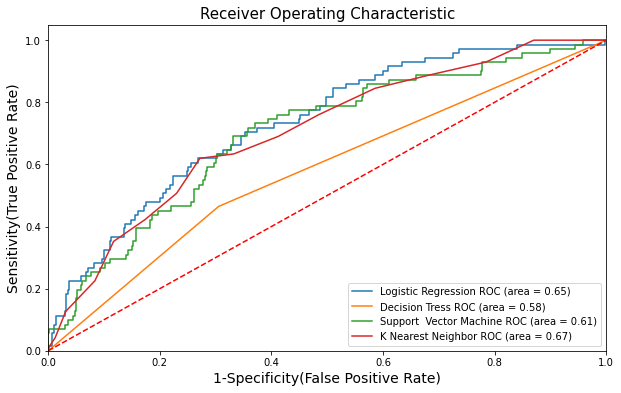

In [61]:
from sklearn import metrics

plt.figure(figsize=(10,6))

# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'Logistic Regression', 'model': best_lr ,},
          { 'label': 'Decision Tress', 'model': best_dtc,},
          { 'label': 'Support  Vector Machine', 'model': best_svm,},
          { 'label': 'K Nearest Neighbor', 'model': best_knn,} 
         ]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(ovsamp_X_train, ovsamp_y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=14)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=14)
plt.title('Receiver Operating Characteristic',fontsize=15)
plt.legend(loc="lower right")
plt.show()   # Display

In [62]:
def test_scores(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    
    return auc, accuracy, recall


# Define a result table as a DataFrame
test_result = pd.DataFrame(columns=['classifiers', 'accuracy','auc'])

# Train the models and record the results
for cls in classifiers:
    y_test_preds = cls.predict_proba(X_test)[:,1]
    
    test_auc, test_accuracy, test_recall = test_scores(y_test,y_test_preds, 0.5) # thresh = 0.5
    
    test_result = test_result.append({'classifiers':cls.__class__.__name__,
                                        'accuracy':test_accuracy, 
                                        'recall':test_recall, 
                                        'auc':test_auc}, ignore_index=True)


# Set name of the classifiers as index labels
test_result.set_index('classifiers', inplace=True)
test_result.sort_values('auc',ascending=False,inplace=True)

In [63]:
import plotly.graph_objs as go

 

trace1=go.Bar(
                x=test_result.index,
                y=test_result.accuracy,
                name="Accuracy",
                marker= dict(color = 'rgba(100, 20, 30, 0.7)',
                            line=dict(width=1.9)),
                text=round(test_result.accuracy,2),textposition='auto')
trace2=go.Bar(
                x=test_result.index,
                y=test_result.recall,
                name="Recall",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)',
                           line=dict(width=1.9)),
                text=round(test_result.recall,2),textposition='auto',)


 

edit_df=[trace1,trace2,]
layout = { 'barmode':'group',
           'title_text':'Accuracy, Recall Plot',}

 

fig= go.Figure(data=edit_df,layout=layout)
#plt.savefig('graph.png')
fig.show()

<br>
<br>
<br>
CHECK FOR OVERFITTING OF THE  MODEL <br>

Overfitting refers to an unwanted behavior of a machine learning algorithm used for predictive modeling.

It is the case where model performance on the training dataset is improved at the cost of worse performance on data not seen during training, such as a holdout test dataset or new data.

We can identify if a machine learning model has overfit by first evaluating the model on the training dataset and then evaluating the same model on a holdout test dataset.

In [64]:


#  Check if there is overfitting of the LR model
lr_acc_test = best_lr.score(X_test, y_test)
print("The Logistic regression test data accuracy score is: ",lr_acc_test*100,"%")
lr_acc_train = best_lr.score(ovsamp_X_train, ovsamp_y_train)
print("The Logistic regression  train data accuracy score is: ",round(lr_acc_train*100,2),"%")

print("")


#  Check if there is overfitting of the DTC model
dtc_acc_test = best_dtc.score(X_test, y_test)
print("The Decision Tree test data accuracy score is: ",dtc_acc_test*100,"%")
dtc_acc_train = best_dtc.score(ovsamp_X_train, ovsamp_y_train)
print("The The Decision Tree  train data accuracy score is: ",round(dtc_acc_train*100,2),"%")

print("")


#  Check if there is overfitting of the SVM model
svm_acc_test = best_svm.score(X_test, y_test)
print("The Support Vector Machine test data accuracy score is: ",svm_acc_test*100,"%")
svm_acc_train = best_svm.score(ovsamp_X_train, ovsamp_y_train)
print("The Support Vector Machin train data accuracy score is: ",round(svm_acc_train*100,2),"%")

print("")

#  Check if there is overfitting of the KNN model
knn_test = best_knn.score(X_test, y_test)
print("The K Nearest Neigbor test data accuracy score is: ",knn_test*100,"%")
knn_train = best_knn.score(ovsamp_X_train, ovsamp_y_train)
print("The K Nearest Neigbor  train data accuracy score is: ",round(knn_train*100,2),"%")

The Logistic regression test data accuracy score is:  75.40983606557377 %
The Logistic regression  train data accuracy score is:  68.62 %

The Decision Tree test data accuracy score is:  66.48451730418944 %
The The Decision Tree  train data accuracy score is:  100.0 %

The Support Vector Machine test data accuracy score is:  71.03825136612022 %
The Support Vector Machin train data accuracy score is:  77.01 %

The K Nearest Neigbor test data accuracy score is:  71.40255009107467 %
The K Nearest Neigbor  train data accuracy score is:  72.99 %


<br>
<br>
<br>
SHAP VALUE

Since our most accurate model using cross validation hyperparamenter tuning is Linear Regression(LR), we will be analsying the feauters Shap values using LR

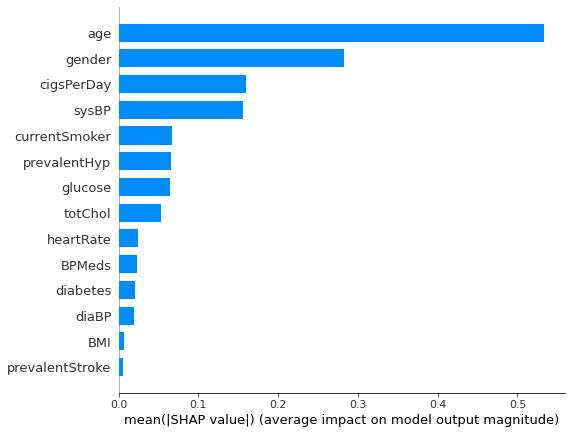

In [65]:

explainer = shap.LinearExplainer(best_lr, ovsamp_X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

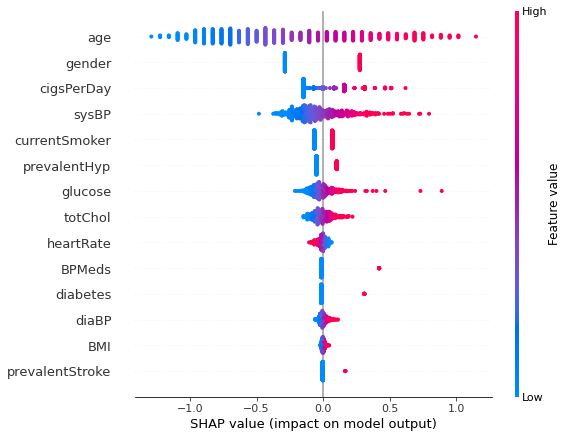

In [66]:
shap.summary_plot(shap_values, X_test)

<br>
<br>
SHAP VALUE FOR DTC

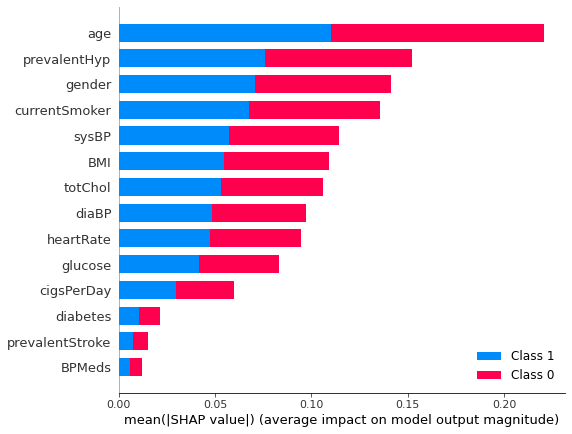

In [67]:

dtc_explainer = shap.TreeExplainer(best_dtc, ovsamp_X_train)
dtc_shap_values = dtc_explainer.shap_values(X_test)
shap.summary_plot(dtc_shap_values, X_test, plot_type="bar")

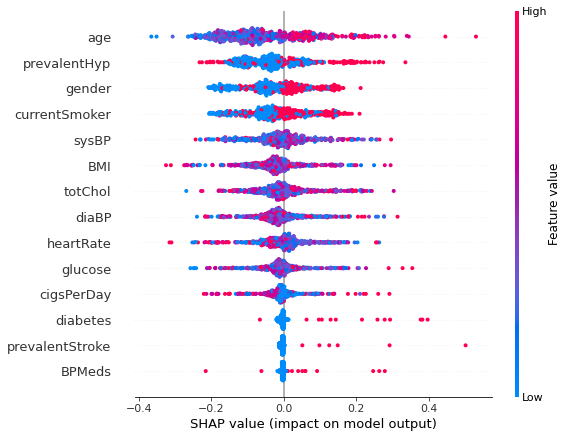

In [68]:
shap.summary_plot(dtc_shap_values[1], X_test,)



SHAP VALUE FOR SVM (Taking too long to laod)


In [69]:
"""


svm = best_svm
svm.fit(ovsamp_X_train,ovsamp_y_train)

svm_explainer = shap.KernelExplainer(svm.predict,X_test)
svm_shap_values = svm_explainer.shap_values(X_test)
shap.summary_plot(svm_shap_values, X_test, plot_type="bar")

"""

'\n\n\nsvm = best_svm\nsvm.fit(ovsamp_X_train,ovsamp_y_train)\n\nsvm_explainer = shap.KernelExplainer(svm.predict,X_test)\nsvm_shap_values = svm_explainer.shap_values(X_test)\nshap.summary_plot(svm_shap_values, X_test, plot_type="bar")\n\n'

In [70]:
# shap.summary_plot(svm_shap_values, X_test)

<br>

<br>

SHAP value for KNN Classifier (Taking too long to laod)

In [71]:
"""
# Train the KNN model

best_knn = KNeighborsClassifier(n_neighbors = 19, weights ='uniform', metric = 'euclidean' )
best_knn.fit(ovsamp_X_train,ovsamp_y_train)
# Produce the SHAP values
knn_explainer = shap.KernelExplainer(best_knn.predict,X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

"""

"\n# Train the KNN model\n\nbest_knn = KNeighborsClassifier(n_neighbors = 19, weights ='uniform', metric = 'euclidean' )\nbest_knn.fit(ovsamp_X_train,ovsamp_y_train)\n# Produce the SHAP values\nknn_explainer = shap.KernelExplainer(best_knn.predict,X_test)\nknn_shap_values = knn_explainer.shap_values(X_test)\n\n"

In [72]:
#shap.summary_plot(knn_shap_values, X_test)

<br>
<br>
<br>
CHECKING FOR BEST FEATURES USING CH SQUARE

In [73]:
# Data Reduction Using Best features 

# Identifying the most important features for heart disease prognosis

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = framingham_clean.iloc[:,0:14]  #independent columns
y = framingham_clean.iloc[:,-1]    #target column

# apply SelectKBest class  to enable the extraction of top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
framinghamscores = pd.DataFrame(fit.scores_)
framinghamcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([framinghamcolumns,framinghamscores],axis=1)
featureScores.columns = ['Features','Score']  # dataframe naming
print(featureScores.nlargest(14,'Score'))  #print best features by score

           Features       Score
9             sysBP  665.803731
13          glucose  370.510431
1               age  295.496252
8           totChol  221.365884
3        cigsPerDay  159.713697
10            diaBP  141.966185
6      prevalentHyp   82.267595
7          diabetes   28.837950
4            BPMeds   28.260500
0            gender   17.357871
11              BMI   15.603716
5   prevalentStroke    8.525723
12        heartRate    2.888815
2     currentSmoker    0.733808


Feature seletion using Chi-square

When creating a predictive model, feature selection is the process of minimising the number of input variables that must be considered.

If it is possible, it is preferable to limit the number of input variables in order to lower the computational cost of modelling while also improving the model's overall performance (in certain situations).

Statistical-based feature selection approaches include analysing the connection between each input variable and the target variable using statistics, and then picking the input variables that have the strongest link with the target variable from the pool of available input variables. Despite the fact that the choice of statistical measures relies on the data type of both the input and output variables, these approaches may be both quick and successful.

The most common correlation measure for categorical data is the chi-squared test. the Chi-Squared Test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for each categorical variable correspond to the predicted frequencies for the category variable under consideration. When the test is performed, a statistic known as the chi-squared distribution, which is called after the Greek capital letter Chi (X), which is pronounced "ki" as in kite, is calculated.

In [74]:
# Sort features according to score on a tabular form
Top_10_best = featureScores.sort_values(by='Score', ascending=False)
Top_10_best.nlargest(14,'Score')

Features       Score
9             sysBP  665.803731
13          glucose  370.510431
1               age  295.496252
8           totChol  221.365884
3        cigsPerDay  159.713697
10            diaBP  141.966185
6      prevalentHyp   82.267595
7          diabetes   28.837950
4            BPMeds   28.260500
0            gender   17.357871
11              BMI   15.603716
5   prevalentStroke    8.525723
12        heartRate    2.888815
2     currentSmoker    0.733808

In [75]:
# selecting the top 10 festures having the most impact on the target variable
features_list = Top_10_best["Features"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'gender']

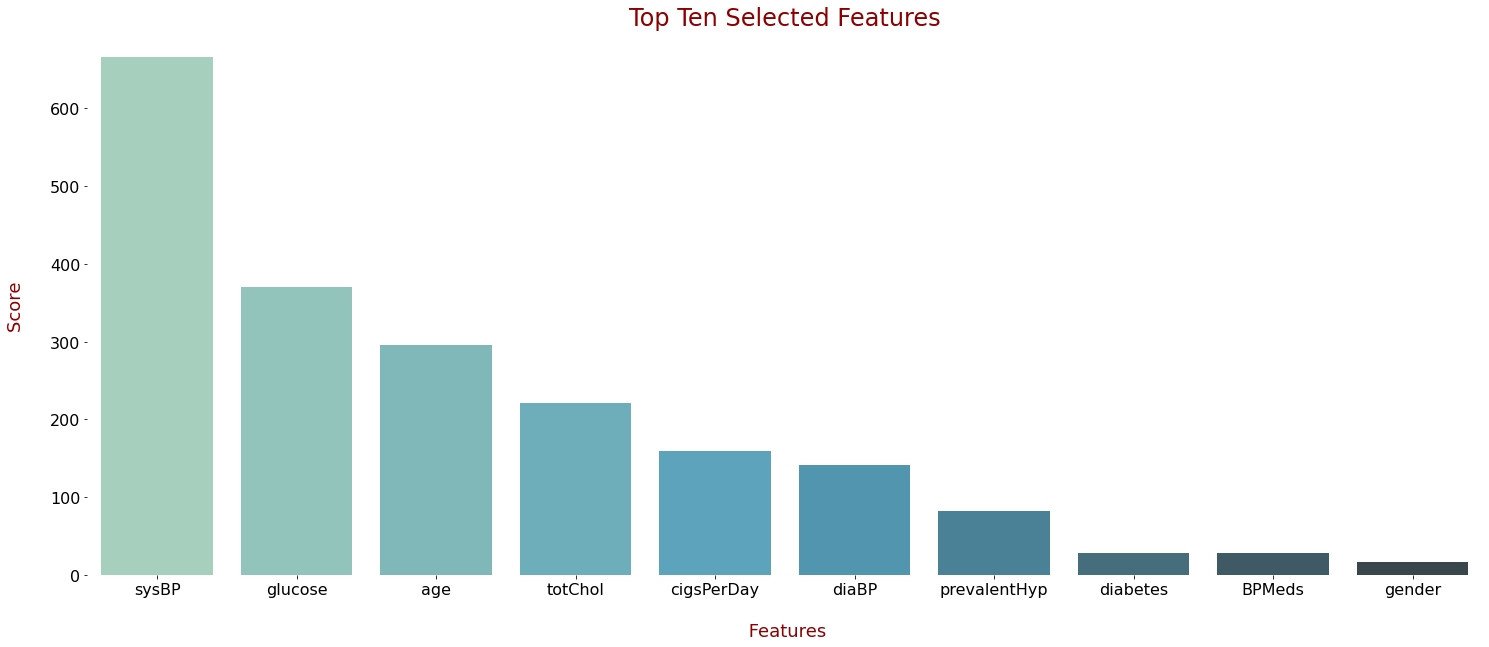

In [76]:
# visualizing top 10 selected festures
plt.figure(figsize=(25,10))
sns.barplot(x='Features', y='Score', data= Top_10_best.nlargest(10,'Score'), palette = "GnBu_d")
plt.box(False)
plt.title('Top Ten Selected Features',color='Darkred', fontsize=24)
plt.xlabel('\n Features',color='Darkred', fontsize=18)
plt.ylabel('Score \n',color='Darkred', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [77]:
# selecting the top 10 festures having the most impact on the target variable
features_list = featureScores["Features"].tolist()[:10]
features_list

['gender',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP']

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# DATA CLEANING AND MODELLING OF CLEVELAND DATASET

Features of Cleveland dataset:<br>
Demographics:<br>
•	Age: The age of the patient<br>
•	Sex: male (1) or female (0)<br>

Cp: Chest pain type<br>
•	Value 0: Asymptomatic<br>
•	Value 1: Atypical angina<br>
•	Value 2: Pain not relating to angina<br>
•	Value 3: Typical angina<br>

Trestbps: Amount of blood pressure measured in millimetres of mercury (mm Hg) when the patient was first admitted to the hospital<br>
Chol: Cholesterol level in mg/dl<br>
Fbs: Determine if the quantity of glucose in the blood is more than 120 mg/dl or less. (0: No, 1: Yes)<br>


Restecg: Results of the electrocardiogram on rest<br>
•	Value 0: probable left ventricular hypertrophy<br>
•	Value 1: normal<br>
•	Value 2: abnormalities in the T wave or ST segment<br>

Thalach: Maximum heart rate during the stress test<br>
Exang: Determine if the patient had angina during exercise (0: No, 1: Yes)<br>


In [78]:
# view datasets 2
cleveland.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

In [79]:
#Check the dataset targeted variable
cleveland.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [80]:
# read data shape
cleveland.shape

(297, 14)

In [81]:
# rename sex colunm to Gender and Condition to Target
cleveland.rename(columns={'sex':'gender','condition':'Target'},inplace=True)

In [82]:
#data type
cleveland.dtypes

age           int64
gender        int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
Target        int64
dtype: object

In [83]:
cleveland.describe()

age      gender          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    1.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal      Target  
count  297.000000  297.000000  
mean     0.835017    0.461279  
std      0.956690    0.499340  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      2.000000    1.000000  
max      2.000000    1.000000

In [84]:
# check for dupicates
duplicate_cleveland = cleveland[cleveland.duplicated()]
duplicate_cleveland

Empty DataFrame
Columns: [age, gender, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, Target]
Index: []

In [85]:
# checking for missing values
cleveland.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Target      0
dtype: int64

# CLEVELAND DATA VISUALIZATION

Ages ranges from 29 to 77, so the following age groups will be created:<br>
29-39 years<br>
40-49 years<br>
50-59 years<br>
60-69 years<br>
70 -79 years<br>

In [86]:
# Creating age groups

cleveland['age'].unique()


array([69, 66, 65, 64, 63, 61, 60, 59, 58, 56, 52, 51, 45, 42, 40, 38, 34,
       74, 71, 70, 62, 57, 55, 54, 50, 49, 48, 46, 44, 41, 35, 29, 76, 68,
       67, 53, 47, 43, 39, 37, 77], dtype=int64)

In [87]:
cleveland['ageGroup'] = pd.cut(x=cleveland['age'], bins=[29, 39, 49, 59, 69,77], 
                          labels=['29-39 years', '40-49 years', '50-59 years', '60-69 years','70-79 years'])
cleveland.head()

age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   69       1   0       160   234    1        2      131      0      0.1   
1   69       0   0       140   239    0        0      151      0      1.8   
2   66       0   0       150   226    0        0      114      0      2.6   
3   65       1   0       138   282    1        2      174      0      1.4   
4   64       1   0       110   211    0        2      144      1      1.8   

   slope  ca  thal  Target     ageGroup  
0      1   1     0       0  60-69 years  
1      0   2     0       0  60-69 years  
2      2   0     0       0  60-69 years  
3      1   1     0       1  60-69 years  
4      1   0     0       0  60-69 years

In [88]:
# renaming the attributes for better visualization
cleveland_cat= cleveland.copy()
cleveland_cat['gender'] = cleveland_cat['gender'].map({0: 'female',1: 'male'})
cleveland_cat['Target'] = cleveland_cat['Target'].map({0:'negative', 1:'positive'})   
cleveland_cat['cp']= cleveland_cat['cp'].map({0:'Asymptomatic', 1:'Atypical angina', 2: 'No angina',
                                              3: 'Typical angina'}) 
cleveland_cat['fbs'] = cleveland_cat['fbs'].map({0:'No', 1:'Yes'})  
cleveland_cat['exang'] = cleveland_cat['exang'].map({0:'No', 1:'Yes'})  
cleveland_cat['restecg']= cleveland_cat['restecg'].map({0:'Hypertrophy', 1:'Normal', 2: 'Abnormalities'}) 
cleveland_cat['slope']= cleveland_cat['slope'].map({0:'Descending', 1:'Flat', 2: 'Ascending'}) 
cleveland_cat['thal']= cleveland_cat['thal'].map({0:'Fixed defect', 1:'Normal flow', 2: 'Reversible defect'}) 

cleveland_cat.head()

age  gender            cp  trestbps  chol  fbs        restecg  thalach  \
0   69    male  Asymptomatic       160   234  Yes  Abnormalities      131   
1   69  female  Asymptomatic       140   239   No    Hypertrophy      151   
2   66  female  Asymptomatic       150   226   No    Hypertrophy      114   
3   65    male  Asymptomatic       138   282  Yes  Abnormalities      174   
4   64    male  Asymptomatic       110   211   No  Abnormalities      144   

  exang  oldpeak       slope  ca          thal    Target     ageGroup  
0    No      0.1        Flat   1  Fixed defect  negative  60-69 years  
1    No      1.8  Descending   2  Fixed defect  negative  60-69 years  
2    No      2.6   Ascending   0  Fixed defect  negative  60-69 years  
3    No      1.4        Flat   1  Fixed defect  positive  60-69 years  
4   Yes      1.8        Flat   0  Fixed defect  negative  60-69 years

In [89]:
# Create a colunm to count the target
cleveland_cat['Count_Target'] = 1
cleveland_cat.head()

age  gender            cp  trestbps  chol  fbs        restecg  thalach  \
0   69    male  Asymptomatic       160   234  Yes  Abnormalities      131   
1   69  female  Asymptomatic       140   239   No    Hypertrophy      151   
2   66  female  Asymptomatic       150   226   No    Hypertrophy      114   
3   65    male  Asymptomatic       138   282  Yes  Abnormalities      174   
4   64    male  Asymptomatic       110   211   No  Abnormalities      144   

  exang  oldpeak       slope  ca          thal    Target     ageGroup  \
0    No      0.1        Flat   1  Fixed defect  negative  60-69 years   
1    No      1.8  Descending   2  Fixed defect  negative  60-69 years   
2    No      2.6   Ascending   0  Fixed defect  negative  60-69 years   
3    No      1.4        Flat   1  Fixed defect  positive  60-69 years   
4   Yes      1.8        Flat   0  Fixed defect  negative  60-69 years   

   Count_Target  
0             1  
1             1  
2             1  
3             1  
4             1

In [90]:
cleveland_gender = cleveland_cat.pivot_table('Count_Target', ['gender', 'Target'], aggfunc="sum").reset_index()
cleveland.head()

age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   69       1   0       160   234    1        2      131      0      0.1   
1   69       0   0       140   239    0        0      151      0      1.8   
2   66       0   0       150   226    0        0      114      0      2.6   
3   65       1   0       138   282    1        2      174      0      1.4   
4   64       1   0       110   211    0        2      144      1      1.8   

   slope  ca  thal  Target     ageGroup  
0      1   1     0       0  60-69 years  
1      0   2     0       0  60-69 years  
2      2   0     0       0  60-69 years  
3      1   1     0       1  60-69 years  
4      1   0     0       0  60-69 years

In [91]:
# barchat plot of the gender by target


fig1 = px.bar(cleveland_gender, x="gender", y = 'Count_Target', color='Target', 
              color_discrete_sequence=['blue', 'red'], 
              width = 600, height=400)

#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig1.update_layout(barmode='stack', title={'text': 'Heart disease by gender', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig1.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))

fig1.show()

In [92]:
plot4 = px.bar(framingham_hyper, x= 'Target', y="Count_Target", color='prevalentHyp', 
              color_discrete_sequence=['red', 'Blue' ], 
              width=500, height=400)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
plot4.update_layout(barmode='stack', title={'text': 'Prevalent Hypertension and Probability of hear disease', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
plot4.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
plot4.show()

<br>


# PREPARING THE CLEVELAND  AND THE  FRAMINGHAM DATASETS FOR MACHINE LEARNING MODELING


The Framingham

In [93]:
ovsamp_X_train.head

<bound method NDFrame.head of       gender       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        0.0  0.342105            0.0    0.000000     0.0              0.0   
1        0.0  0.578947            1.0    0.285714     0.0              0.0   
2        1.0  0.315789            0.0    0.000000     0.0              0.0   
3        0.0  0.131579            1.0    0.285714     0.0              0.0   
4        1.0  0.736842            0.0    0.000000     0.0              0.0   
...      ...       ...            ...         ...     ...              ...   
2353     0.0  0.546811            0.0    0.000000     0.0              0.0   
2354     1.0  0.903313            0.0    0.000000     0.0              0.0   
2355     1.0  0.240569            1.0    0.611251     0.0              0.0   
2356     0.0  0.159972            1.0    0.285714     0.0              0.0   
2357     1.0  0.325906            1.0    0.285714     0.0              0.0   

      prevalentHyp  diabetes   to

<br>
<br>
<br>
DROPPING THE UNREQUIRED FEATURES FROM THE FRAMINGHAM DATASET

In [94]:
fr_X =ovsamp_X_train.drop(['currentSmoker', 'BMI', 'diabetes','cigsPerDay','prevalentStroke','prevalentHyp','diaBP','BPMeds'], axis=1)

fr_X.head()

gender       age   totChol     sysBP  heartRate   glucose
0     0.0  0.342105  0.304843  0.115839   0.313131  0.084746
1     0.0  0.578947  0.367521  0.196217   0.262626  0.132768
2     1.0  0.315789  0.441595  0.144208   0.313131  0.101695
3     0.0  0.131579  0.361823  0.172577   0.313131  0.112994
4     1.0  0.736842  0.347578  0.295508   0.363636  0.192090

In [95]:
#renaming the framingham target class

fr_y = ovsamp_y_train

<br>
<br>
<br>
IMPORTING THE CLEVELAND DATA WITH SELECTED FEATURES
<br>

The cleveland dataset was modified using microsoft excel leaving only the selected features

In [96]:
cleveland_selected = pd.read_csv('cleveland_cleaned.csv')

In [97]:
cleveland_selected .head()

gender  age  totChol  sysBP  heartRate  glucose  Target
0       1   29      204    130        202       79       0
1       1   34      182    118        174       79       0
2       0   34      210    118        192       79       0
3       0   35      183    138        182       79       0
4       1   35      192    122        174       79       0

<br>

DATA NORMALIZATION

<br>
Scaling the features

Aside from decision trees and random forests, the other classifiers that will be evaluated will need scaled data in order to be effective.

In [98]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
cleveland_scaled = pd.DataFrame(scaler.fit_transform(cleveland_selected), columns=cleveland_selected.columns)

In [99]:
cleveland_scaled.describe()

gender         age     totChol       sysBP   heartRate     glucose  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.676768    0.532127    0.277055    0.355600    0.599995    0.144781   
std      0.468500    0.188536    0.118716    0.167574    0.175126    0.352474   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.395833    0.194064    0.245283    0.473282    0.000000   
50%      1.000000    0.562500    0.267123    0.339623    0.625954    0.000000   
75%      1.000000    0.666667    0.342466    0.433962    0.725191    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Target  
count  297.000000  
mean     0.461279  
std      0.499340  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [100]:
#Slitting the cleveland data into two x and y axis

#lebeling the x and y axis
clev_y = cleveland_scaled['Target']
clev_X = cleveland_scaled.drop(['Target'], axis = 1)


In [101]:
clev_X.head()

gender       age   totChol     sysBP  heartRate  glucose
0     1.0  0.000000  0.178082  0.339623   1.000000      0.0
1     1.0  0.104167  0.127854  0.226415   0.786260      0.0
2     0.0  0.104167  0.191781  0.226415   0.923664      0.0
3     0.0  0.125000  0.130137  0.415094   0.847328      0.0
4     1.0  0.125000  0.150685  0.264151   0.786260      0.0

APPLYING THE MACHINE LEARNING CLASSIFIER

In [102]:
best_svm=SVC(kernel='rbf', gamma ='scale',C=50, probability=True)
best_knn = KNeighborsClassifier(n_neighbors = 19, weights ='uniform', metric = 'euclidean' )
best_lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
besy_dtc = DecisionTreeClassifier()
best_dtc = DecisionTreeClassifier(criterion ='entropy', splitter='random', max_features ='sqrt')

classifiers = [best_svm,best_dtc,best_lr,best_knn]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(fr_X, fr_y)   
    
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(clev_X, clev_y)*100)))

The accuracy score of SVC(C=50, probability=True) is: 53.20%
The accuracy score of DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       splitter='random') is: 58.59%
The accuracy score of LogisticRegression(solver='liblinear') is: 64.65%
The accuracy score of KNeighborsClassifier(metric='euclidean', n_neighbors=19) is: 59.26%


<br>
<br>
<br>
USING CROSS VALIDATION HYPERPARATER TUNNNG TO RE-CHECK FOR BEST FIT

<br>
<br>

DTC

In [103]:

# example of grid searching key hyperparameters for a Decision tree


# define models and parameters
dtc = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']

# define grid search
dtc_grid = dict(criterion=criterion, splitter = splitter,max_features=max_features)
cv = 5
dtc_grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
dtc_grid_result = dtc_grid_search.fit(fr_X, fr_y)
# summarize results
print("Best DTC hypoerparamenter tunning with cross validation is: %f using %s" % (dtc_grid_result.best_score_,
                                                                                    dtc_grid_result.best_params_))

print('')
dtc_means = dtc_grid_result.cv_results_['mean_test_score']
dtc_stds = dtc_grid_result.cv_results_['std_test_score']
dtc_params = dtc_grid_result.cv_results_['params']
for dtc_mean, dtc_stdev, dtc_param in zip(dtc_means, dtc_stds, dtc_params):
    print("%f (%f) with: %r" % (dtc_mean, dtc_stdev, dtc_param))

Best DTC hypoerparamenter tunning with cross validation is: 0.687489 using {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}

0.676041 (0.050550) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
0.679841 (0.045017) with: {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}
0.670927 (0.033883) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.679389 (0.024174) with: {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
0.659921 (0.039033) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
0.675596 (0.025858) with: {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
0.683236 (0.033770) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.664144 (0.023094) with: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
0.687489 (0.042210) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
0.666696 (

<br>
<br>

LR

In [104]:


# define models and parameters
lr = LogisticRegression()
lr_solvers = ['newton-cg', 'lbfgs', 'liblinear']
lr_penalty = ['l2']
lr_c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
lr_grid = dict(solver=lr_solvers,penalty=lr_penalty,C=lr_c_values)
lr_cv =RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_grid, n_jobs=-1, cv=lr_cv, scoring='accuracy',error_score=0)
lr_grid_result = lr_grid_search.fit(fr_X, fr_y)


# summarize results
lev1 = (lr_grid_result.best_score_, lr_grid_result.best_params_)
print("Best LR hypoerparamenter tunning with cross validation is: %f using  %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))

print('')
lr_means = lr_grid_result.cv_results_['mean_test_score']
lr_stds = lr_grid_result.cv_results_['std_test_score']
lr_params = lr_grid_result.cv_results_['params']
for lr_mean, lr_stdev, lr_param in zip(lr_means, lr_stds, lr_params):
    print("%f (%f) with: %r" % (lr_mean, lr_stdev, lr_param))

Best LR hypoerparamenter tunning with cross validation is: 0.684902 using  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

0.683914 (0.019181) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.683914 (0.019181) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.683773 (0.019044) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.683631 (0.019809) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.683631 (0.019809) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.683773 (0.019679) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.683488 (0.019994) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.683488 (0.019994) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.684902 (0.021033) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.672882 (0.020520) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.672882 (0.020520) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.665813 (0.020147) with: {'C': 0.1, 'penalty

<br>
<br>
KNN

In [105]:

# define models and parameters
knn= KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv =RepeatedStratifiedKFold(n_splits=50, n_repeats=3, random_state=1)
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
knn_grid_result = knn_grid_search.fit(fr_X, fr_y)
# summarize results
print("Best Knn hypoerparamenter tunning with cross validation is: %f using %s" % (knn_grid_result.best_score_,
                                                                                   knn_grid_result.best_params_))
print('')
knn_means = knn_grid_result.cv_results_['mean_test_score']
knn_stds = knn_grid_result.cv_results_['std_test_score']
knn_params = knn_grid_result.cv_results_['params']
for knn_mean, knn_stdev, knn_param in zip(knn_means, knn_stds, knn_params):
    print("%f (%f) with: %r" % (knn_mean, knn_stdev, knn_param))

Best Knn hypoerparamenter tunning with cross validation is: 0.756696 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

0.747086 (0.064548) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.747086 (0.064548) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.733564 (0.058823) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.751507 (0.058029) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.724344 (0.060768) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.751891 (0.063074) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.707367 (0.062727) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.748652 (0.059074) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.702417 (0.065380) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.747249 (0.061232) with: {'metric': 'euclidea


<br>
<br>
SVM

In [106]:
# example of grid searching key hyperparametres for SVC

# define dataset

# define model and parameters
svm = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
svm_grid = dict(kernel=kernel,C=C,gamma=gamma)
svm_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_grid, n_jobs=-1, cv=svm_cv, scoring='accuracy',error_score=0)
svm_grid_result = svm_grid_search.fit(fr_X, fr_y)

# summarize results
print("Best svm hypoerparamenter tunning with cross validation is: %f using %s" % (svm_grid_result.best_score_,
                                                                                   svm_grid_result.best_params_))
print('')
svm_means = svm_grid_result.cv_results_['mean_test_score']
svm_stds = svm_grid_result.cv_results_['std_test_score']
svm_params = svm_grid_result.cv_results_['params']
for svm_mean, svm_stdev, svm_param in zip(svm_means, svm_stds, svm_params):
    print("%f (%f) with: %r" % (svm_mean, svm_stdev, svm_param))

Best svm hypoerparamenter tunning with cross validation is: 0.692677 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

0.682920 (0.022032) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.689847 (0.015387) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.377449 (0.024376) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.679666 (0.022102) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.692677 (0.019739) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.377165 (0.024646) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.680374 (0.020249) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.688857 (0.020074) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.377448 (0.025242) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.683909 (0.018935) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.681928 (0.019948) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.394835 (0.023721) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0

<br>
<br>
REVAIDATING THE MODEL USING THE BEST CROSS VALIDAION HYPERPARMETER TUNNING

In [107]:
b_svm=SVC(kernel='rbf', gamma ='scale',C=10, probability=True)
b_knn = KNeighborsClassifier(n_neighbors = 1, weights ='uniform', metric = 'manhattan' )
b_lr = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
b_dtc = DecisionTreeClassifier(criterion ='entropy', splitter='random', max_features ='sqrt')

classifiers = [b_svm,b_dtc,b_lr,b_knn]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(fr_X, fr_y)   
    
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(clev_X, clev_y)*100)))

The accuracy score of SVC(C=10, probability=True) is: 63.64%
The accuracy score of DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       splitter='random') is: 55.22%
The accuracy score of LogisticRegression(solver='newton-cg') is: 63.97%
The accuracy score of KNeighborsClassifier(metric='manhattan', n_neighbors=1) is: 53.54%


In [108]:

# Define a result table as a DataFrame
model_result = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for clas in classifiers:
    fit_model=clas.fit(fr_X, fr_y) 
    yp =fit_model.predict_proba(clev_X)[::,1]
    
    fpr, tpr, _ = roc_curve(clev_y,  yp)
    auc = roc_auc_score(clev_y, yp)
    
    model_result = model_result.append({'classifiers':clas.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


# Set name of the classifiers as index labels
model_result.set_index('classifiers', inplace=True)
model_result.sort_values('auc',ascending=False,inplace=True)

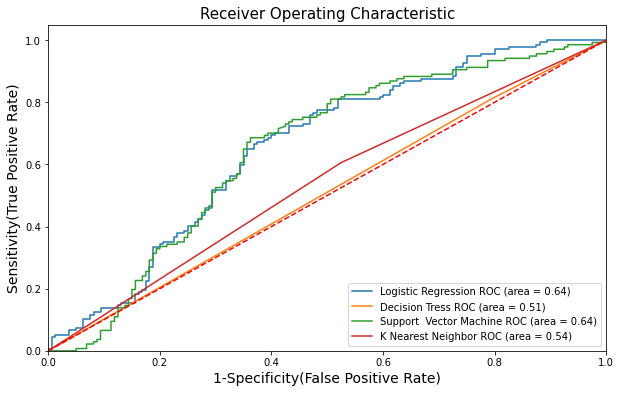

In [109]:
plt.figure(figsize=(10,6))

# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'Logistic Regression', 'model': b_lr ,},
          { 'label': 'Decision Tress', 'model': b_dtc,},
          { 'label': 'Support  Vector Machine', 'model': b_svm,},
          { 'label': 'K Nearest Neighbor', 'model': b_knn,} 
         ]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(fr_X, fr_y) # train the model
    y_pred=model.predict(clev_X) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(clev_y, model.predict_proba(clev_X)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(clev_y,model.predict(clev_X))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=14)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=14)
plt.title('Receiver Operating Characteristic',fontsize=15)
plt.legend(loc="lower right")
plt.show()   # Display

In [110]:
def test_scores(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    
    return auc, accuracy, recall


# Define a result table as a DataFrame
test_result = pd.DataFrame(columns=['classifiers', 'accuracy','auc'])

# Train the models and record the results
for cls in classifiers:
    y_test_preds = cls.predict_proba(clev_X)[:,1]
    
    test_auc, test_accuracy, test_recall = test_scores(clev_y,y_test_preds, 0.5) # thresh = 0.5
    
    test_result = test_result.append({'classifiers':cls.__class__.__name__,
                                        'accuracy':test_accuracy, 
                                        'recall':test_recall, 
                                        'auc':test_auc}, ignore_index=True)


# Set name of the classifiers as index labels
test_result.set_index('classifiers', inplace=True)
test_result.sort_values('auc',ascending=False,inplace=True)

In [111]:
import plotly.graph_objs as go

 

trace1=go.Bar(
                x=test_result.index,
                y=test_result.accuracy,
                name="Accuracy",
                marker= dict(color = 'rgb(140, 86, 75)',
                            line=dict(width=1.9)),
                text=round(test_result.accuracy,3),textposition='auto')
trace2=go.Bar(
                x=test_result.index,
                y=test_result.recall,
                name="Recall",
                marker=dict(color = 'rgb(23, 190, 207)',
                           line=dict(width=1.9)),
                text=round(test_result.recall,3),textposition='auto',)
trace3=go.Bar(
                x=test_result.index,
                y=test_result.auc,
                name="AUC",
                marker=dict(color = 'rgb(188, 189, 34)',
                           line=dict(width=1.9)),
                text=round(test_result.auc,3),textposition='auto')

 

edit_df=[trace1,trace2,trace3]
layout = { 'barmode':'group',
           'title_text':'Accuracy, Recall and AUC Plot' }

 

fig= go.Figure(data=edit_df,layout=layout)
plt.savefig('graph.png')
fig.show()

<Figure size 432x288 with 0 Axes>

<br>
<br>
RL SHAP VALUE USING FRAMINGHSM AS TRAIN AND CLEVELAND AS FIT

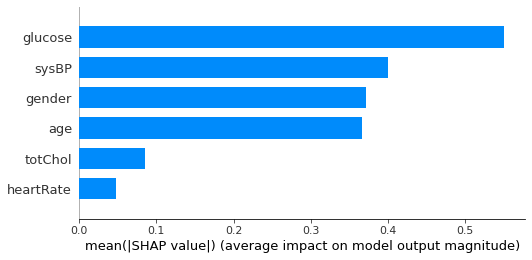

In [112]:

explainer = shap.LinearExplainer(b_lr, fr_X)
shap_values = explainer.shap_values(clev_X)
shap.summary_plot(shap_values, clev_X, plot_type="bar")

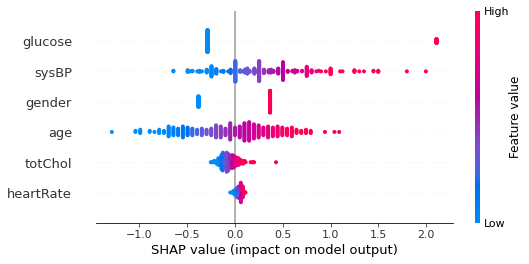

In [113]:
shap.summary_plot(shap_values, clev_X)

<br>
<br>
DTC SHAP VALUE USING FRAMINGHSM AS TRAIN AND CLEVELAND AS FIT

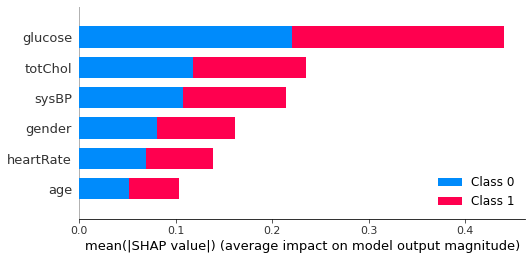

In [114]:

dtc_explainer = shap.TreeExplainer(b_dtc,fr_X)
dtc_shap_values = dtc_explainer.shap_values(clev_X)
shap.summary_plot(dtc_shap_values, clev_X, plot_type="bar")

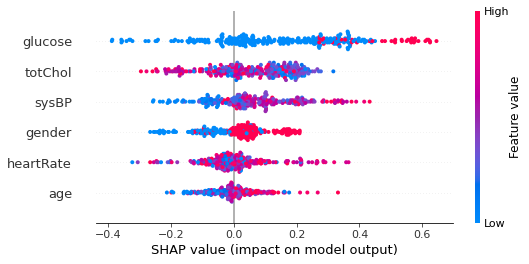

In [115]:
shap.summary_plot(dtc_shap_values[1], clev_X,)

<br>
<br>
SVM SHAP VALUE USING FRAMINGHSM AS TRAIN AND CLEVELAND AS FIT

In [116]:
"""
b_svm.fit(ovsamp_X_train,ovsamp_y_train)

svm_explainer = shap.KernelExplainer(b_svm,fr_X)
svm_shap_values = svm_explainer.shap_values(clev_X)
shap.summary_plot(svm_shap_values, clev_X, plot_type="bar")
"""

'\nb_svm.fit(ovsamp_X_train,ovsamp_y_train)\n\nsvm_explainer = shap.KernelExplainer(b_svm,fr_X)\nsvm_shap_values = svm_explainer.shap_values(clev_X)\nshap.summary_plot(svm_shap_values, clev_X, plot_type="bar")\n'

In [117]:
#shap.summary_plot(svm_shap_values, clev_X)

<br>
<br>
<br>
PLOTTING CONFUSION MATRIX<br>
<br>
How the confusion matrix works:<br>

Upper Left Square: The amount of correctly classified by our model as no heart disease. <br>
Upper Right Square: The amount of incorrectly classified patients as having heart disease, but the actual label is no heart disease.<br>
Lower Left Square: The amount of incorrectly classified patients as no heart disease, but the actual label is present of heart disease. <br>
Lower Right Square: The amount of correctly classified by our model of heart disease present. 

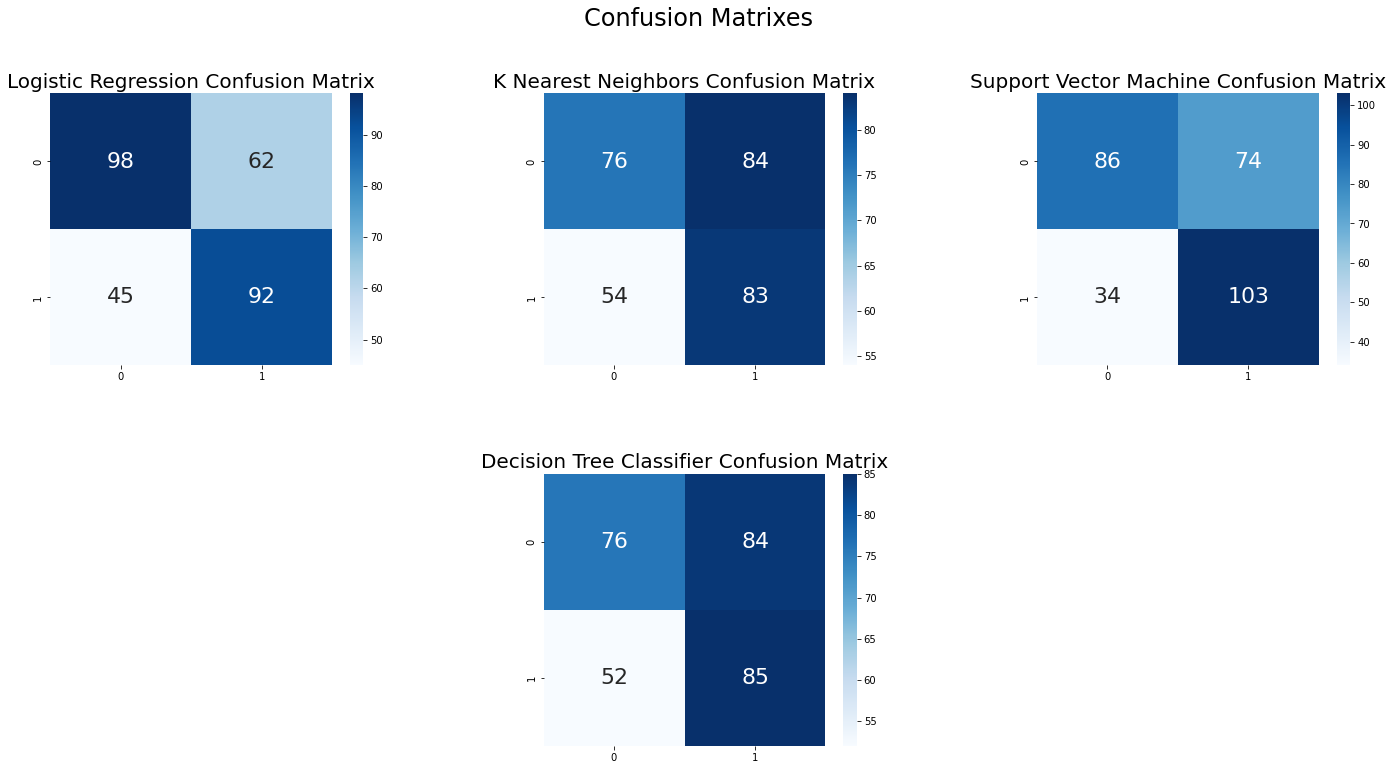

In [118]:
# plotting confusion matrix
b_lr.fit(fr_X,fr_y)
b_lr_pd = b_lr.predict(clev_X)

b_dtc.fit(fr_X,fr_y)
b_dtc_pd = b_dtc.predict(clev_X)

b_knn.fit(fr_X,fr_y)
b_knn_pd = b_knn.predict(clev_X)

b_svm.fit(fr_X,fr_y)
b_svm_pd = b_svm.predict(clev_X)

                             
cm_lr = confusion_matrix(clev_y,b_lr_pd)
cm_knn = confusion_matrix(clev_y,b_knn_pd)
cm_svm = confusion_matrix(clev_y,b_svm_pd)
cm_dtc = confusion_matrix(clev_y,b_dtc_pd)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=20)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 22})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=20)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 22})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix",fontsize=20)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 22})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=20)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 22})


plt.show()


APPLYING THE MODEL

In [ ]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Age patient: >>> ") 
    my_predictors.append(age)
    gender = input("Gender of patient. male=1, female=0: >>> ") 
    my_predictors.append(gender)
    cigsPerDay = input("Number of cigarettes smoked by patient a day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Symbolic blood pressure of patient: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Diastolic blood pressure of patient: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Colesterol level of patient: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input(" Is the patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Patient have diabetes: Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("WWhat is the glucose level of the patient? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Is the patient on blood pressure medications? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    fram = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame( fram, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = b_lr.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient is likely to have a Heart Disease.")
    if my_y_pred == 0:
        print("The patient is not likely to have Heart Disease.")
        
start_questionnaire()

Input Patient Information:


## THE END

<br>
<br>
<br>

### APPLYING NEURAL NETWORK ( future work)

In [ ]:
"""

# classification mlp model for the abalone dataset


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# load dataset

model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
# fit the keras model on the dataset
model.fit(fr_X, fr_y, epochs=150, batch_size=32, verbose=2)
# evaluate on test set
yhat = model.predict(clev_X)
yhat = np(yhat, axis=-1).astype('int')
acc = accuracy_score(clev_y, yhat)
print('Accuracy: %.3f' % acc)

"""